In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier


# Görselleştirme ayarları
%matplotlib inline
sns.set(style="whitegrid")

print("Tüm kütüphaneler yüklendi.")

Tüm kütüphaneler yüklendi.


In [7]:
#DOSYA YOLLARI YÜKLEME KISMI
path_flights = r'/Users/oguzhanozdemir/Desktop/veri/dataSet/flights.csv'
path_airports = r'/Users/oguzhanozdemir/Desktop/veri/dataSet/airports.csv'
path_airlines = r'/Users/oguzhanozdemir/Desktop/veri/dataSet/airlines.csv'


In [8]:
def load_data(path_flights, path_airports, path_airlines):
   
    try:
        df_flights = pd.read_csv(path_flights, low_memory=False)
        print(f"Flights tablosu yüklendi. Boyut: {df_flights.shape}")
        
        df_airports = pd.read_csv(path_airports)
        print(f"Airports tablosu yüklendi. Boyut: {df_airports.shape}")
        
        df_airlines = pd.read_csv(path_airlines)
        print(f"Airlines tablosu yüklendi. Boyut: {df_airlines.shape}")
        
        return df_flights, df_airports, df_airlines
    
    except FileNotFoundError as e:
        print(f"Dosya bulunamadı. ({e})")
        return None, None, None
    except Exception as e:
        print(f"Hata oluştu. ({e})")
        return None, None, None

print("load_data fonksiyonu tanımlandı.")


load_data fonksiyonu tanımlandı.


In [9]:
try: 
    df_flights = pd.read_csv(path_flights, low_memory=False)
    print(f"Flights tablosunun boyutu : {df_flights.shape}")
    df_airports = pd.read_csv(path_airports)
    print(f"Airports tablosunun boyutu : {df_airports.shape}")
    df_airlines = pd.read_csv(path_airlines)
    print(f"Airlines tablosunun boyutu : {df_airlines.shape}")

except FileNotFoundError as e:
    print(f"Dosya bulunamadı. ({e})")

except Exception as e : 
    print(f"Hata oluştu. ({e})")
    

Flights tablosunun boyutu : (5819079, 31)
Airports tablosunun boyutu : (322, 7)
Airlines tablosunun boyutu : (14, 2)


In [10]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [11]:
df_airports.describe()

,LATITUDE,LONGITUDE
count,319.000000,319.000000
mean,38.981244,-98.378964
std,8.616736,21.523492
min,13.483450,-176.646030
25%,33.652040,-110.839385
50%,39.297610,-93.403070
75%,43.154675,-82.722995
max,71.285450,-64.798560


In [12]:
print("her sütunda bulunan toplam null değer sayısı")
df_airports.isnull().sum()

her sütunda bulunan toplam null değer sayısı


IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [13]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_airports.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


IATA_CODE    322
AIRPORT      322
CITY         308
STATE         54
COUNTRY        1
LATITUDE     319
LONGITUDE    319
dtype: int64

In [14]:
print("Airports tablosunun ilk 5 satırı: ")
df_airports.head(5)

Airports tablosunun ilk 5 satırı: 


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [15]:
print("Airports tablosunun son 5 satırı ")
df_airports.tail(5)

Airports tablosunun son 5 satırı 


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023
321,YUM,Yuma International Airport,Yuma,AZ,USA,32.65658,-114.60597


In [16]:
df_airlines.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes


In [17]:
df_airlines.describe()

,IATA_CODE,AIRLINE
count,14,14
unique,14,14
top,UA,United Air Lines Inc.
freq,1,1


In [18]:
print("her sütunda bulunan toplam null değer sayısı")
df_airlines.isnull().sum()

her sütunda bulunan toplam null değer sayısı


IATA_CODE    0
AIRLINE      0
dtype: int64

In [19]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_airlines.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


IATA_CODE    14
AIRLINE      14
dtype: int64

In [20]:
print("Airlines tablosunun ilk 5 satırı ")
df_airlines.head(5)

Airlines tablosunun ilk 5 satırı 


,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [21]:
print("Airlines tablosunun son 5 satırı: ")
df_airlines.tail(5)

Airlines tablosunun son 5 satırı: 


,IATA_CODE,AIRLINE
9,DL,Delta Air Lines Inc.
10,EV,Atlantic Southeast Airlines
11,HA,Hawaiian Airlines Inc.
12,MQ,American Eagle Airlines Inc.
13,VX,Virgin America


In [22]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [23]:
df_flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [24]:
print("her sütunda bulunan toplam null değer sayısı")
df_flights.isnull().sum()

her sütunda bulunan toplam null değer sayısı


YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [25]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_flights.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


YEAR                      1
MONTH                    12
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6952
TAIL_NUMBER            4897
ORIGIN_AIRPORT          628
DESTINATION_AIRPORT     629
SCHEDULED_DEPARTURE    1321
DEPARTURE_TIME         1440
DEPARTURE_DELAY        1217
TAXI_OUT                184
WHEELS_OFF             1440
SCHEDULED_TIME          550
ELAPSED_TIME            712
AIR_TIME                675
DISTANCE               1363
WHEELS_ON              1440
TAXI_IN                 185
SCHEDULED_ARRIVAL      1435
ARRIVAL_TIME           1440
ARRIVAL_DELAY          1240
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       4
AIR_SYSTEM_DELAY        570
SECURITY_DELAY          154
AIRLINE_DELAY          1067
LATE_AIRCRAFT_DELAY     695
WEATHER_DELAY           632
dtype: int64

In [26]:
print("Flights tablosunun ilk 5 satırı ")
df_flights.head(5)

Flights tablosunun ilk 5 satırı 


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
print("Flights tablosunun son 5 satırı: ")
df_flights.tail(5)

Flights tablosunun son 5 satırı: 


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
def preprocess_pipeline(df_flights_split, df_airlines_full, df_airports_full):
  
    #TABLO BİRLEŞTİRME İŞLEMLERİ
  
    df = pd.merge(df_flights_split, df_airlines_full, left_on='AIRLINE', right_on='IATA_CODE', how='left')
    df.drop('IATA_CODE', axis=1, inplace=True)
    df = pd.merge(df, df_airports_full.add_suffix('_ORIGIN'), left_on='ORIGIN_AIRPORT', right_on='IATA_CODE_ORIGIN', how='left')
    df.drop(['IATA_CODE_ORIGIN'], axis=1, inplace=True)
    df = pd.merge(df, df_airports_full.add_suffix('_DEST'), left_on='DESTINATION_AIRPORT', right_on='IATA_CODE_DEST', how='left')
    df.drop(['IATA_CODE_DEST'], axis=1, inplace=True)

    # FAZLA NULL DEĞERLER BARINDIRAN SÜTUNLARIN SİLİNMESİ
    high_null_cols = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
    df.drop(columns=high_null_cols, inplace=True)

    #İptal edilen uçuşlar ve yönlendirilen uçuşların kaldırılması.
    
    df = df[(df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)].copy()
    df.drop(columns=['CANCELLED', 'DIVERTED'], inplace=True)

    #Amerika'da uçuşlar 15 dakikadan fazla gecikme olduğu zaman uçuş gecikmiş sayıldığı için 'IS_DELAYED' değişkeni oluşturup bunun üzerinden kontrol edeceğiz.
    df['IS_DELAYED'] = (df['ARRIVAL_DELAY'] > 15).astype(int)

    # veri setindeki 'SCHEDULED_DEPARTURE' kısmında saatler normal yazılmamıştır örn: 5,10,15 gibi . Bunu gece sabah öğle akşam ve gece yarısı olarak günün bölümlerine ayırıyoruz.
    df['SCHEDULED_HOUR'] = df['SCHEDULED_DEPARTURE'].astype(str).str.zfill(4).str[:2].astype(int)
    bins = [-1, 5, 11, 16, 20, 23]
    labels = ['Gece (00-05)', 'Sabah (06-11)', 'Öğle (12-16)', 'Akşam (17-20)', 'Gece Yarısı (21-23)']
    df['TIME_OF_DAY'] = pd.cut(df['SCHEDULED_HOUR'], bins=bins, labels=labels, ordered=False)

    silinecek_sutunlar = [
          #sızıntı yapanlar
        'DEPARTURE_TIME',
        'DEPARTURE_DELAY',
        'TAXI_OUT',
        'WHEELS_OFF',
        'ELAPSED_TIME',
        'AIR_TIME',
        'WHEELS_ON',
        'TAXI_IN',
        'ARRIVAL_TIME',
        'ARRIVAL_DELAY',

        #gereksizler hepsi aynı değer
        'YEAR',
        'COUNTRY_ORIGIN',
        'COUNTRY_DEST',
        
        #gürültüye sebebiyet verenler
        'TAIL_NUMBER',        
        'FLIGHT_NUMBER',

        #eklenen zenginleştirmeler
        'AIRLINE_NAME',
        'AIRPORT_ORIGIN',
        'CITY_ORIGIN',
        'STATE_ORIGIN',
        'LATITUDE_ORIGIN',
        'LONGITUDE_ORIGIN',
        'AIRPORT_DEST',
        'CITY_DEST',
        'STATE_DEST',
        'LATITUDE_DEST',
        'LONGITUDE_DEST',


        #gereksiz değişkenler
        'SCHEDULED_DEPARTURE', 
        'SCHEDULED_HOUR', 
        'SCHEDULED_ARRIVAL'
    ]
    df.drop(columns=silinecek_sutunlar, inplace=True)
    
    df.dropna(inplace=True)

    return df

print("preprocess_pipeline fonksiyonu tanımlandı.")

preprocess_pipeline fonksiyonu tanımlandı.


In [29]:
def encode_features(X_train, X_test, y_train):

   #Target encoding yapıyoruz. Yanı havalimanı kodları yerine ortalama gecikme oranı yazılıyor. One hot encoding yapmaya kalksak çok havalimanı kodu olduğundan çok fazla sütun çıkardı o yüzden target encoding en mantıklısı.
    
    target_encode_cols = ['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
    ohe_cols = ['AIRLINE', 'TIME_OF_DAY']

    # veri sızıntısını önleme
    train_data_temp = X_train.copy()
    train_data_temp['IS_DELAYED'] = y_train

    for col in target_encode_cols:
        mapping = train_data_temp.groupby(col)['IS_DELAYED'].mean()
        X_train[col + '_ENCODED'] = X_train[col].map(mapping)
        X_test[col + '_ENCODED'] = X_test[col].map(mapping)
        global_mean = y_train.mean()
        X_train[col + '_ENCODED'].fillna(global_mean, inplace=True)
        X_test[col + '_ENCODED'].fillna(global_mean, inplace=True)
        
    # ohe 
    X_train = pd.get_dummies(X_train, columns=ohe_cols, prefix=ohe_cols, dtype=int)
    X_test = pd.get_dummies(X_test, columns=ohe_cols, prefix=ohe_cols, dtype=int)

    # sütun hizalama
    train_cols = X_train.columns
    X_test = X_test.reindex(columns=train_cols, fill_value=0)

    # eski sütunları silme
    X_train.drop(columns=target_encode_cols, inplace=True)
    X_test.drop(columns=target_encode_cols, inplace=True)
    
    print("Encoding işlemleri tamamlandı.")
    return X_train, X_test

print("encode_features fonksiyonu tanımlandı.")

encode_features fonksiyonu tanımlandı.


In [30]:
#dosya yolları
BASE_PATH = r'/Users/oguzhanozdemir/Desktop/veri/dataSet'
path_flights = f'{BASE_PATH}/flights.csv' 
path_airports = f'{BASE_PATH}/airports.csv'
path_airlines = f'{BASE_PATH}/airlines.csv'

#veri yükleme
df_flights, df_airports, df_airlines = load_data(path_flights, path_airports, path_airlines)

if df_flights is not None:
    
    #veriyi test ve train olarak bölme
    
    flights_train, flights_test = train_test_split(df_flights, test_size=0.2, random_state=42)
    print(f"Flights Train boyutu: {flights_train.shape}")
    print(f"Flights Test boyutu: {flights_test.shape}")
    

    df_airlines.rename(columns={'AIRLINE': 'AIRLINE_NAME'}, inplace=True)
    
    print("\nEğitim verisi için proses pipeline fonksiyonu çağırılıyor ")
    train_df = preprocess_pipeline(flights_train, df_airlines, df_airports)
    
    print("Test verisi için proses pipeline fonksiyonu çağırılıyor")
    test_df = preprocess_pipeline(flights_test, df_airlines, df_airports)
    

    print(f"Train Veri Boyutu: {train_df.shape}")
    print(f"Test Veri Boyutu: {test_df.shape}")

else:
    print("Veri yüklenemedi, işlemler durduruldu.")

Flights tablosu yüklendi. Boyut: (5819079, 31)
Airports tablosu yüklendi. Boyut: (322, 7)
Airlines tablosu yüklendi. Boyut: (14, 2)
Flights Train boyutu: (4655263, 31)
Flights Test boyutu: (1163816, 31)

Eğitim verisi için proses pipeline fonksiyonu çağırılıyor 
Test verisi için proses pipeline fonksiyonu çağırılıyor
Train Veri Boyutu: (4571137, 10)
Test Veri Boyutu: (1142871, 10)


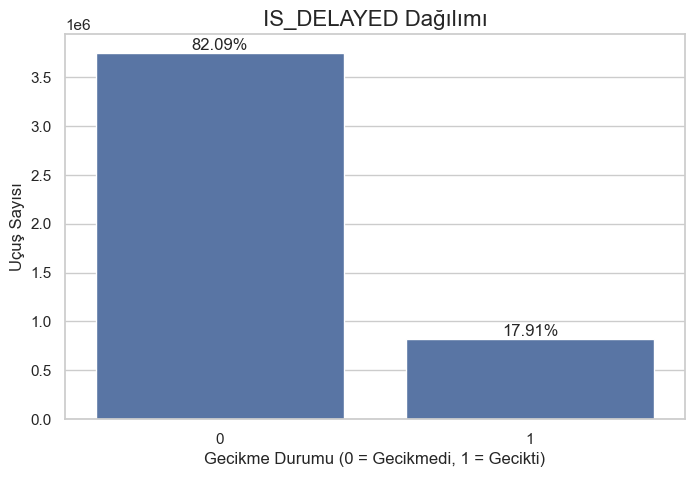


Sayısal Değişkenlerin Dağılımı ('DISTANCE','SCHEDULED_TIME'):


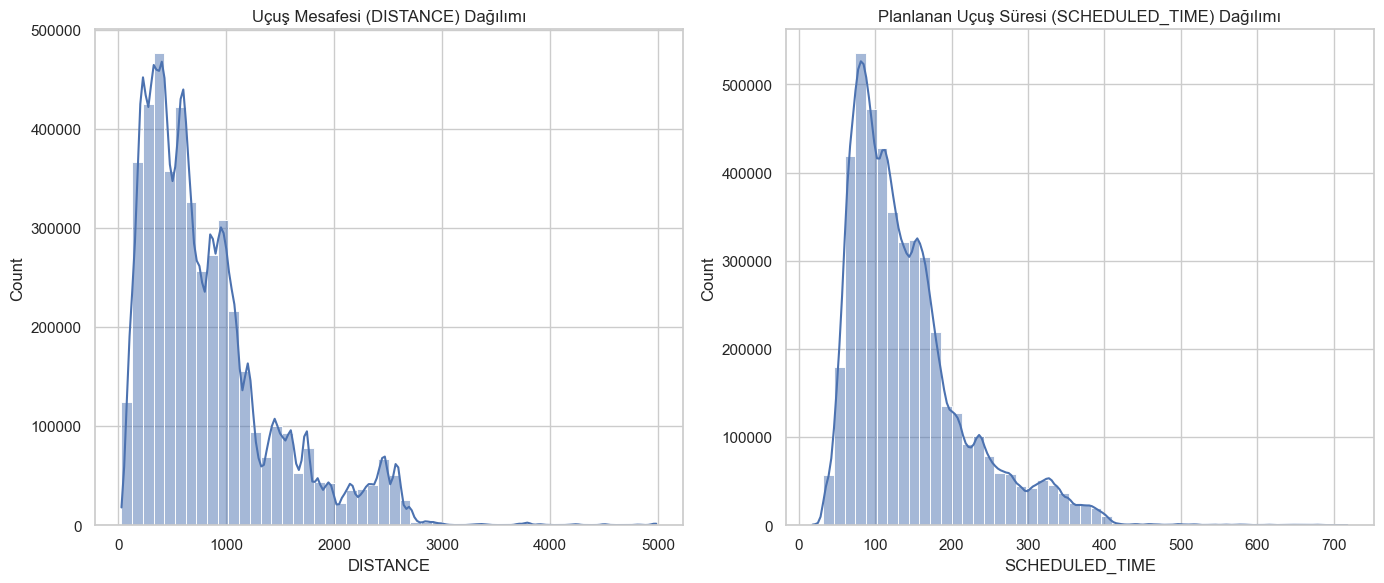


Sayısal Değişkenler ve Hedef Değişken Arasındaki Korelasyon:


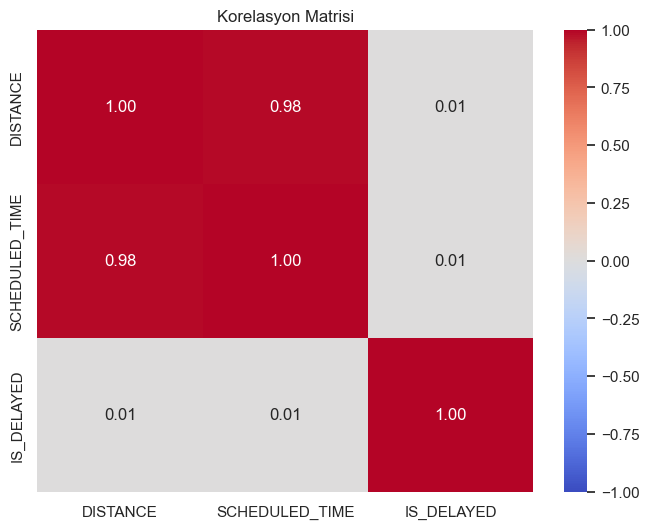

In [31]:
if 'train_df' in locals():

    # 1. EDA - Gecikme Durumu Dağılımı
    plt.figure(figsize=(8, 5))
    sns.countplot(x='IS_DELAYED', data=train_df)
    plt.title('IS_DELAYED Dağılımı', fontsize=16)
    plt.xlabel('Gecikme Durumu (0 = Gecikmedi, 1 = Gecikti)')
    plt.ylabel('Uçuş Sayısı')

    # Yüzde hesaplama ve yazdırma
    total = len(train_df)
    ax = plt.gca()
    for p in ax.patches:
        percentage = f'{(p.get_height() / total * 100):.2f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
    plt.show()


    # 2. Histogramlar
    print(f"\nSayısal Değişkenlerin Dağılımı ('DISTANCE','SCHEDULED_TIME'):")

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(train_df['DISTANCE'], kde=True, bins=50)
    plt.title('Uçuş Mesafesi (DISTANCE) Dağılımı')

    plt.subplot(1, 2, 2)
    sns.histplot(train_df['SCHEDULED_TIME'], kde=True, bins=50)
    plt.title('Planlanan Uçuş Süresi (SCHEDULED_TIME) Dağılımı')
    plt.tight_layout()
    plt.show()


    # 3. Korelasyon Analizi
    print("\nSayısal Değişkenler ve Hedef Değişken Arasındaki Korelasyon:")

    # --- EKLENEN KISIM BAŞLANGICI ---
    # Hata almamak için numeric_features listesini burada tanımlıyoruz.
    # Histogramda baktığınız değişkenleri buraya ekledim:
    numeric_features = ['DISTANCE', 'SCHEDULED_TIME'] 
    # --- EKLENEN KISIM BİTİŞİ ---

    # Korelasyon matrisi
    # numeric_features listesine hedef değişkeni (IS_DELAYED) ekleyip korelasyona bakıyoruz
    corr_df = train_df[numeric_features + ['IS_DELAYED']].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Korelasyon Matrisi')
    plt.show()

else:
    print("Veriler bulunamadı.")

In [32]:
import warnings

# FutureWarning türündeki tüm uyarıları görmezden gel (Gizle)
warnings.simplefilter(action='ignore', category=FutureWarning)

if 'train_df' in locals():
    # x = özellik, y = hedef oluşturma
    
    X_train = train_df.drop('IS_DELAYED', axis=1)
    y_train = train_df['IS_DELAYED']
    
    X_test = test_df.drop('IS_DELAYED', axis=1)
    y_test = test_df['IS_DELAYED']

    # Encoding
    
    X_train_encoded, X_test_encoded = encode_features(X_train, X_test, y_train)
 
    print(f"Eğitime hazır X_train_encoded boyutu: {X_train_encoded.shape}")
    print(f"Teste hazır X_test_encoded boyutu: {X_test_encoded.shape}")
    
else:
    print("Veriler bulunamadı.")

Encoding işlemleri tamamlandı.
Eğitime hazır X_train_encoded boyutu: (4571137, 26)
Teste hazır X_test_encoded boyutu: (1142871, 26)


In [33]:
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, mean_absolute_error, average_precision_score 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

if 'X_train_encoded' in locals():
   
    print("Model 1 = LogisticRegression (Doğrusal Basit Model)")

    #Model Tanımlama ve Eğitme
    simple_model = LogisticRegression(solver='saga', n_jobs=-1, random_state=42)
    simple_model.fit(X_train_encoded, y_train)
    
    #1. Normal Tahmin Etme (0 ve 1 şeklinde)
    y_pred_simple = simple_model.predict(X_test_encoded)
    
    #Olasılık Tahmin Etme
    y_prob_simple = simple_model.predict_proba(X_test_encoded)[:, 1]

    #Model Skor Hesaplanması
    acc_simple = accuracy_score(y_test, y_pred_simple)
    auc_simple = roc_auc_score(y_test, y_prob_simple)
    mae_simple = mean_absolute_error(y_test, y_pred_simple) 
    pr_auc_simple = average_precision_score(y_test, y_prob_simple)

    print(f"Logistic Regression Doğruluk Oranı: {acc_simple * 100:.2f}%")
    print(f"Logistic Regression MAE: {mae_simple:.2f}")
    print(f"Logistic Regression ROC AUC Skoru: {auc_simple:.2f}")
    print(f"Logistic Regression PR AUC Skoru: {pr_auc_simple:.2f}")
    
    print("Logistic Regression Model Raporu:")
    print(classification_report(y_test, y_pred_simple))

else:
    print("Eğitim verileri bulunamadı")

Model 1 = LogisticRegression (Doğrusal Basit Model)
Logistic Regression Doğruluk Oranı: 82.09%
Logistic Regression MAE: 0.18
Logistic Regression ROC AUC Skoru: 0.60
Logistic Regression PR AUC Skoru: 0.23
Logistic Regression Model Raporu:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    938225
           1       0.00      0.00      0.00    204646

    accuracy                           0.82   1142871
   macro avg       0.41      0.50      0.45   1142871
weighted avg       0.67      0.82      0.74   1142871



In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, mean_absolute_error, average_precision_score

print("Model 2 = Gauss Naive Bayes Modeli")

if 'X_train_encoded' in locals():
    #var_smoothing parametresi ek olarak eklendi
    nb_tuned = GaussianNB(var_smoothing=1e-2)
    
    nb_tuned.fit(X_train_encoded, y_train)
    y_pred_nb_tuned = nb_tuned.predict(X_test_encoded)
    y_prob_nb_tuned = nb_tuned.predict_proba(X_test_encoded)[:, 1]
    
    #Model Skor Hesaplaması
    acc_nb_tuned = accuracy_score(y_test, y_pred_nb_tuned)
    auc_nb_tuned = roc_auc_score(y_test, y_prob_nb_tuned)
    mae_nb_tuned = mean_absolute_error(y_test, y_pred_nb_tuned)
    pr_auc_nb_tuned = average_precision_score(y_test, y_prob_nb_tuned)

    print(f"Naive Bayes Doğruluk Oranı: %{acc_nb_tuned * 100:.2f}")
    print(f"Naive Bayes MAE: {mae_nb_tuned:.2f}")
    print(f"Naive Bayes ROC AUC Skoru: {auc_nb_tuned:.2f}")
    print(f"Naive Bayes PR AUC Skoru: {pr_auc_nb_tuned:.2f}")
    
    print("Naive Bayes Model Raporu:")
    print(classification_report(y_test, y_pred_nb_tuned))
    
else:
    print("HATA: Eğitim verisi bulunamadı.")

Model 2 = Gauss Naive Bayes Modeli
Naive Bayes Doğruluk Oranı: %82.09
Naive Bayes MAE: 0.18
Naive Bayes ROC AUC Skoru: 0.51
Naive Bayes PR AUC Skoru: 0.18
Naive Bayes Model Raporu:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    938225
           1       0.00      0.00      0.00    204646

    accuracy                           0.82   1142871
   macro avg       0.41      0.50      0.45   1142871
weighted avg       0.67      0.82      0.74   1142871



In [35]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, f1_score, recall_score, precision_score, 
                             roc_auc_score, average_precision_score, mean_absolute_error)
import pandas as pd
import warnings

# Uyarıları gizle
warnings.simplefilter(action='ignore', category=FutureWarning)

if 'X_train_encoded' in locals():
    print("Feature Selection yöntemi olarak Mutual Information seçildi")

    # 1. Ölçekleme işlemi (Scaling)
    # Feature selection ve Lojistik Regresyon için veriyi standartlaştırmak önemlidir.
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_encoded)
    X_test_scaled = scaler.transform(X_test_encoded)

    # 2. Selection işlemi (En iyi 15 sütun)
    print("Özellik seçimi yapılıyor (Mutual Info), bu işlem veri boyutuna göre biraz zaman alabilir...")
    selector = SelectKBest(score_func=mutual_info_classif, k=15)
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    X_test_selected = selector.transform(X_test_scaled)

    # Seçilen sütunları yazdırma
    cols = X_train_encoded.columns
    selected_mask = selector.get_support()
    selected_names = cols[selected_mask].tolist()

    print(f"\nSeçilen Özellik Sayısı: {len(selected_names)}")
    print("Seçilen Özellikler:")
    for i, name in enumerate(selected_names, 1):
        print(f"{i}. {name}")

    # 3. Modeli Seçilen Sütunlarla Eğitme
    print("\nModel eğitiliyor...")
    sel_model = LogisticRegression(solver='saga', n_jobs=-1, random_state=42)
    sel_model.fit(X_train_selected, y_train)
    
    # 4. Tahminler
    y_pred_sel = sel_model.predict(X_test_selected)
    # AUC metrikleri için olasılık değerleri (1. sınıfın olasılığı)
    y_prob_sel = sel_model.predict_proba(X_test_selected)[:, 1]

    # 5. Metrik Hesaplamaları
    acc_sel = accuracy_score(y_test, y_pred_sel)
    f1_sel = f1_score(y_test, y_pred_sel, average='binary')
    rec_sel = recall_score(y_test, y_pred_sel, average='binary')
    prec_sel = precision_score(y_test, y_pred_sel, average='binary')
    auc_sel = roc_auc_score(y_test, y_prob_sel)
    pr_auc_sel = average_precision_score(y_test, y_prob_sel)
    mae_sel = mean_absolute_error(y_test, y_pred_sel)

    # 6. Sonuçları Yazdırma
    print("-" * 40)
    print(f"Logistic Regression (Feature Selection Sonrası) Performansı:")
    print("-" * 40)
    print(f"Accuracy (Doğruluk) : %{acc_sel * 100:.2f}")
    print(f"F1 Score            : %{f1_sel * 100:.2f}")
    print(f"Recall (Duyarlılık) : %{rec_sel * 100:.2f}")
    print(f"Precision (Kesinlik): %{prec_sel * 100:.2f}")
    print(f"ROC AUC             : %{auc_sel * 100:.2f}")
    print(f"PR AUC              : %{pr_auc_sel * 100:.2f}")
    print(f"MAE (Ortalama Hata) : {mae_sel:.4f}")
    print("-" * 40)

else:
    print("Veri bulunamadı. Lütfen önceki veri yükleme adımlarını çalıştırın.")

Feature Selection yöntemi olarak Mutual Information seçildi
Özellik seçimi yapılıyor (Mutual Info), bu işlem veri boyutuna göre biraz zaman alabilir...

Seçilen Özellik Sayısı: 15
Seçilen Özellikler:
1. AIRLINE_AA
2. AIRLINE_B6
3. AIRLINE_DL
4. AIRLINE_EV
5. AIRLINE_F9
6. AIRLINE_MQ
7. AIRLINE_NK
8. AIRLINE_OO
9. AIRLINE_UA
10. AIRLINE_WN
11. TIME_OF_DAY_Gece (00-05)
12. TIME_OF_DAY_Sabah (06-11)
13. TIME_OF_DAY_Öğle (12-16)
14. TIME_OF_DAY_Akşam (17-20)
15. TIME_OF_DAY_Gece Yarısı (21-23)

Model eğitiliyor...
----------------------------------------
Logistic Regression (Feature Selection Sonrası) Performansı:
----------------------------------------
Accuracy (Doğruluk) : %82.09
F1 Score            : %0.00
Recall (Duyarlılık) : %0.00
Precision (Kesinlik): %0.00
ROC AUC             : %61.53
PR AUC              : %24.39
MAE (Ortalama Hata) : 0.1791
----------------------------------------


In [36]:
#Seçilen selection yöntemini Naive Bayes modeli üzerinde deneme

if 'X_train_selected' in locals():
    nb_sel = GaussianNB()
    nb_sel.fit(X_train_selected, y_train)
    
    y_pred_nb_sel = nb_sel.predict(X_test_selected)
    acc_nb_sel = accuracy_score(y_test, y_pred_nb_sel)

    print(f"Selection işlemi sonrası Naive Bayes model skoru:: %{acc_nb_sel * 100:.2f}")
else:
    print("Veri bulunamadı")

Selection işlemi sonrası Naive Bayes model skoru:: %75.55


In [41]:
print("Boyut indirgeme işlemi için LDA(Linear Discriminant Analysis) yöntemi seçildi")

if 'X_train_scaled' in locals():
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
    lda_for_log = LDA(n_components=1)
    
    # Değişken X_train_lda_log olarak tanımlanıyor
    X_train_lda_log = lda_for_log.fit_transform(X_train_scaled, y_train)
    X_test_lda_log = lda_for_log.transform(X_test_scaled)
    
    
    print(f"LDA sonrası özellik sayısı: {X_train_lda_log.shape[1]}")
    
    # LDA yöntemi ile Logistic model eğitimi
    log_lda_model = LogisticRegression(solver='saga', n_jobs=-1, random_state=42)
    log_lda_model.fit(X_train_lda_log, y_train)
    
    y_pred_log_lda = log_lda_model.predict(X_test_lda_log)
    acc_log_lda = accuracy_score(y_test, y_pred_log_lda)
    
    print(f"LDA işlemi sonrası Logistic Regression modelinin doğruluk skoru: %{acc_log_lda * 100:.2f}")
    
else:
    print("Veri bulunamadı")

Boyut indirgeme işlemi için LDA(Linear Discriminant Analysis) yöntemi seçildi
LDA sonrası özellik sayısı: 1
LDA işlemi sonrası Logistic Regression modelinin doğruluk skoru: %82.09


In [42]:

if 'X_train_scaled' in locals():
    lda = LDA(n_components=1)
    
    X_train_lda = lda.fit_transform(X_train_scaled, y_train)
    X_test_lda = lda.transform(X_test_scaled)
    
    print(f"LDA sonrası özellik sayısı: {X_train_lda.shape[1]}")
    
    # LDA yöntemi ile Naive Bayes model eğitimi
    nb_lda = GaussianNB()
    nb_lda.fit(X_train_lda, y_train)
    
    y_pred_nb_lda = nb_lda.predict(X_test_lda)
    acc_nb_lda = accuracy_score(y_test, y_pred_nb_lda)
    
   
    print(f"LDA işlemi sonrası Naive Bayes modelinin doğruluk skoru: %{acc_nb_lda * 100:.2f}")
  
    
else:
    print("Veri bulunamadı")

LDA sonrası özellik sayısı: 1
LDA işlemi sonrası Naive Bayes modelinin doğruluk skoru: %82.09


Modellerin doğruluk skorlarının karşılaştırılması 


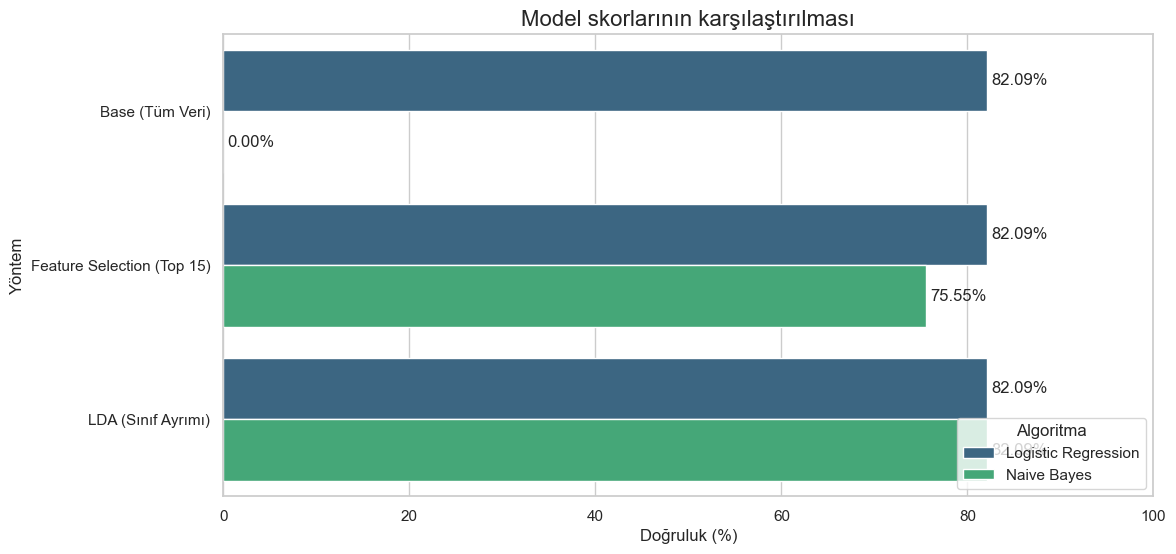


Genel Sonuç Tablosu:
             Algoritma                      Yöntem  Doğruluk (%)
0  Logistic Regression             Base (Tüm Veri)     82.093692
1  Logistic Regression  Feature Selection (Top 15)     82.093692
5          Naive Bayes          LDA (Sınıf Ayrımı)     82.093692
2  Logistic Regression          LDA (Sınıf Ayrımı)     82.091330
4          Naive Bayes  Feature Selection (Top 15)     75.546234
3          Naive Bayes             Base (Tüm Veri)      0.000000


In [43]:
from sklearn.metrics import accuracy_score

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

print("Modellerin doğruluk skorlarının karşılaştırılması ")




#Logistic Regression modelinin skorları
acc_log_base = accuracy_score(y_test, y_pred_simple) if 'y_pred_simple' in locals() else 0

acc_log_sel = accuracy_score(y_test, y_pred_sel) if 'y_pred_sel' in locals() else 0

acc_log_lda = accuracy_score(y_test, y_pred_log_lda) if 'y_pred_log_lda' in locals() else 0



#Naive Bayes Skorları modelinin skorları
acc_nb_base = accuracy_score(y_test, y_pred_nb_base) if 'y_pred_nb_base' in locals() else 0

acc_nb_sel = accuracy_score(y_test, y_pred_nb_sel) if 'y_pred_nb_sel' in locals() else 0

acc_nb_lda = accuracy_score(y_test, y_pred_nb_lda) if 'y_pred_nb_lda' in locals() else 0

results = {

    'Algoritma': [

        'Logistic Regression', 'Logistic Regression', 'Logistic Regression',

        'Naive Bayes', 'Naive Bayes', 'Naive Bayes'

    ],

    'Yöntem': [

        'Base (Tüm Veri)', 'Feature Selection (Top 15)', 'LDA (Sınıf Ayrımı)',

        'Base (Tüm Veri)', 'Feature Selection (Top 15)', 'LDA (Sınıf Ayrımı)'

    ],

    'Doğruluk (%)': [

        acc_log_base * 100, acc_log_sel * 100, acc_log_lda * 100,

        acc_nb_base * 100, acc_nb_sel * 100, acc_nb_lda * 100

    ]

}
# DataFrame oluşturma ve sıralama işlemi
df_results = pd.DataFrame(results).sort_values(by='Doğruluk (%)', ascending=False)

# Görselleştirme işlemi
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Doğruluk (%)', y='Yöntem', hue='Algoritma', data=df_results, palette='viridis')



plt.title('Model skorlarının karşılaştırılması', fontsize=16)
plt.xlim(0, 100)
plt.legend(title='Algoritma', loc='lower right')

for container in ax.containers:

    ax.bar_label(container, fmt='%.2f%%', padding=3)
plt.show()

print("\nGenel Sonuç Tablosu:")
print(df_results)

Modellerin metrik sonuçlarının karşılaştırılması
Model Eğitiliyor: Logistic Regression...
Model Eğitiliyor: Naive Bayes...

Genel Metrik Sonuçlar Tablosu
                     Accuracy  ROC AUC  PR AUC  F1 Score  MAE (Hata)
Model                                                               
Logistic Regression     82.09    59.89   23.42       0.0        0.18
Naive Bayes             82.09    50.77   18.17       0.0        0.18


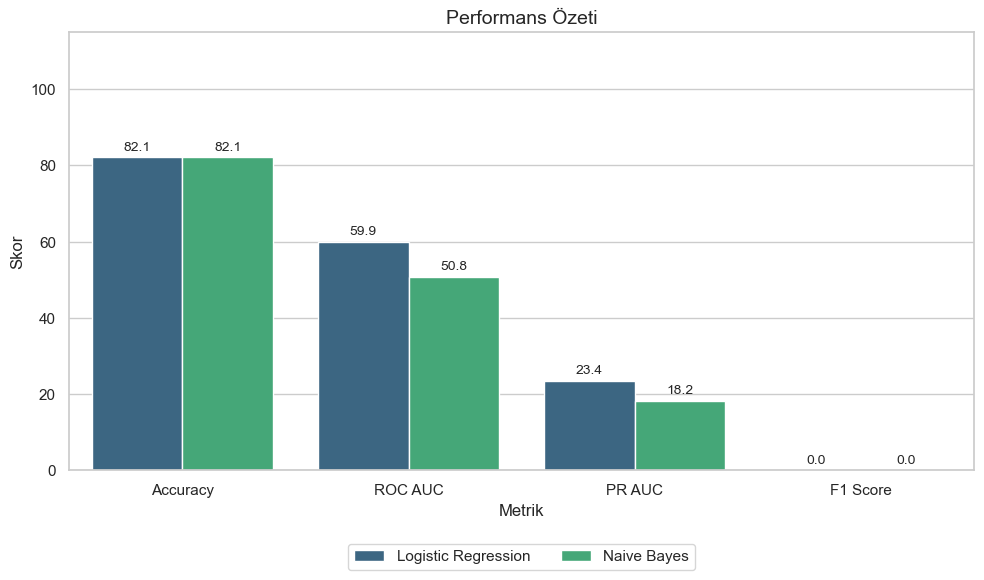

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, 
                             average_precision_score, mean_absolute_error)

sns.set(style="whitegrid")

if 'X_train_encoded' in locals():

    print("Modellerin metrik sonuçlarının karşılaştırılması")
    
    # Modelleri Tanımla
    models = {
        "Logistic Regression": LogisticRegression(solver='saga', max_iter=100, random_state=42),
        "Naive Bayes": GaussianNB(var_smoothing=1e-2)
    }

    results = []

    # Modelleri eğitme ve test etme
    for name, model in models.items():
        print(f"Model Eğitiliyor: {name}...")
        try:
            model.fit(X_train_encoded, y_train)
            y_pred = model.predict(X_test_encoded)
            
            if hasattr(model, "predict_proba"):
                y_prob = model.predict_proba(X_test_encoded)[:, 1]
            else:
                y_prob = y_pred

            # Metrikleri hesaplama işlemi
            acc = accuracy_score(y_test, y_pred) * 100
            f1 = f1_score(y_test, y_pred, average='binary') * 100
            roc_auc = roc_auc_score(y_test, y_prob) * 100
            pr_auc = average_precision_score(y_test, y_prob) * 100 
            mae = mean_absolute_error(y_test, y_pred) 
            
            results.append({
                "Model": name,
                "Accuracy": acc,
                "ROC AUC": roc_auc,
                "PR AUC": pr_auc,
                "F1 Score": f1,
                "MAE (Hata)": mae
            })
            
        except Exception as e:
            print(f"Hata ({name}): {e}")

    # Sonuçları Görselleştirme
    if results:
        df_results = pd.DataFrame(results)
        df_results = df_results.set_index("Model").sort_values(by="PR AUC", ascending=False)
        
        print("\nGenel Metrik Sonuçlar Tablosu")
        print(df_results.round(2))

        plt.figure(figsize=(10, 6)) 

        df_melted = df_results.reset_index().melt(id_vars="Model", var_name="Metrik", value_name="Skor")
        plot_metrics = ["Accuracy", "ROC AUC", "PR AUC", "F1 Score"] 
        df_plot = df_melted[df_melted["Metrik"].isin(plot_metrics)]
        
        # Çizim işlemi
        ax = sns.barplot(x="Metrik", y="Skor", hue="Model", data=df_plot, palette="viridis")
        
        plt.title("Performans Özeti", fontsize=14)
        plt.ylim(0, 115)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
        
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f', padding=3, fontsize=10)

        plt.tight_layout()
        plt.show()

else:
    print("Veri bulunamadı")

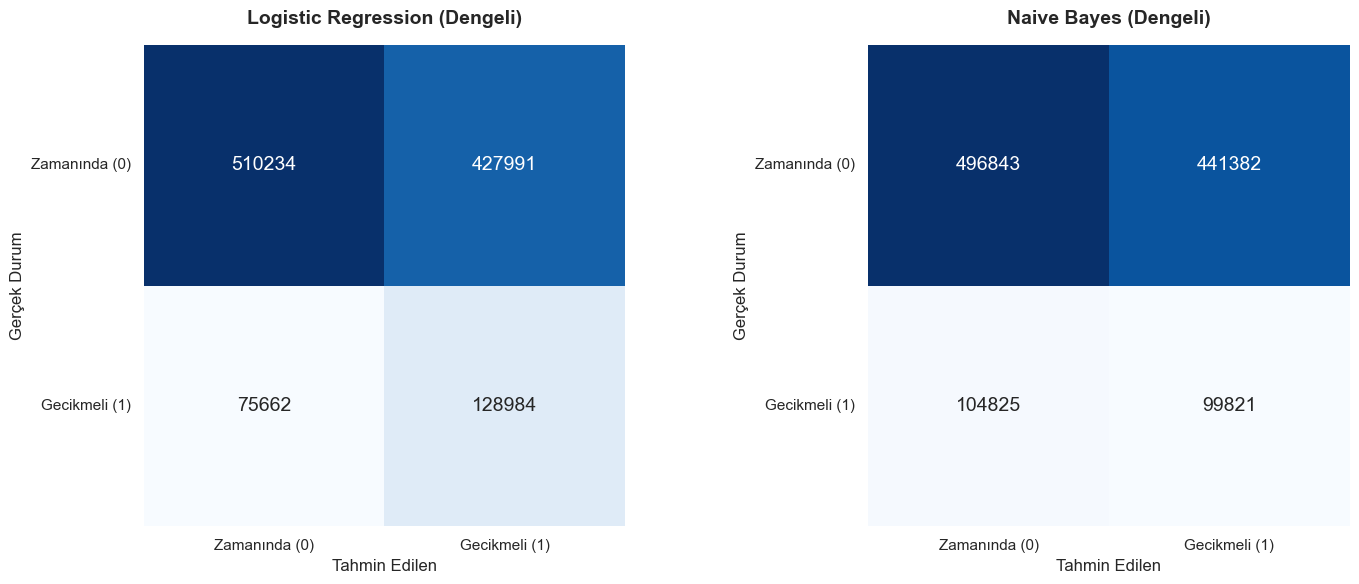

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

sns.set(style="white")

if 'X_train_encoded' in locals():
    models_balanced = {
        "Logistic Regression (Dengeli)": LogisticRegression(
            solver='saga', 
            class_weight='balanced', 
            max_iter=100, 
            random_state=42
        ),
        
        "Naive Bayes (Dengeli)": GaussianNB(
            var_smoothing=1e-2, 
            priors=[0.5, 0.5]
        )
    }

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    for ax, (name, model) in zip(axes, models_balanced.items()):
    
        model.fit(X_train_encoded, y_train)
  
        y_pred = model.predict(X_test_encoded)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                    ax=ax, annot_kws={"size": 14}, square=True)
        ax.set_title(f"{name}", fontsize=14, fontweight='bold', pad=15)
        ax.set_xlabel('Tahmin Edilen', fontsize=12)
        ax.set_ylabel('Gerçek Durum', fontsize=12)
        ax.set_xticklabels(['Zamanında (0)', 'Gecikmeli (1)'], fontsize=11)
        ax.set_yticklabels(['Zamanında (0)', 'Gecikmeli (1)'], fontsize=11, rotation=0)

    plt.tight_layout()
    plt.show()
    
  

else:
    print("Veri bulunamadı.")

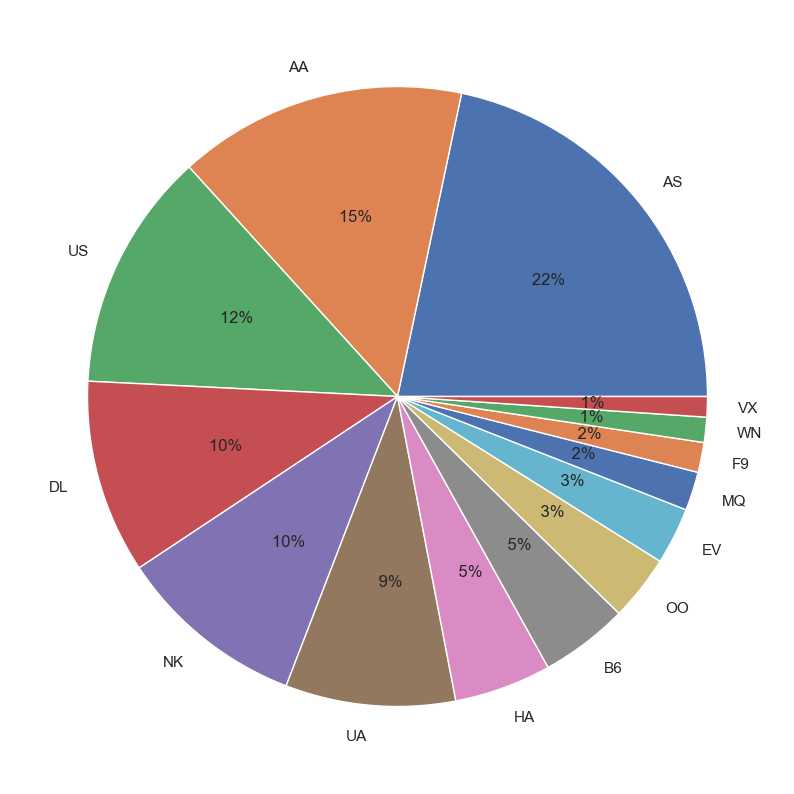

In [46]:
axis = plt.subplots(figsize=(10,14))
Name = df_flights["AIRLINE"].unique()
size = df_flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

en çok uçuşun kalktığı ilk 20 havaalanını ORIGIN_AIRPORT


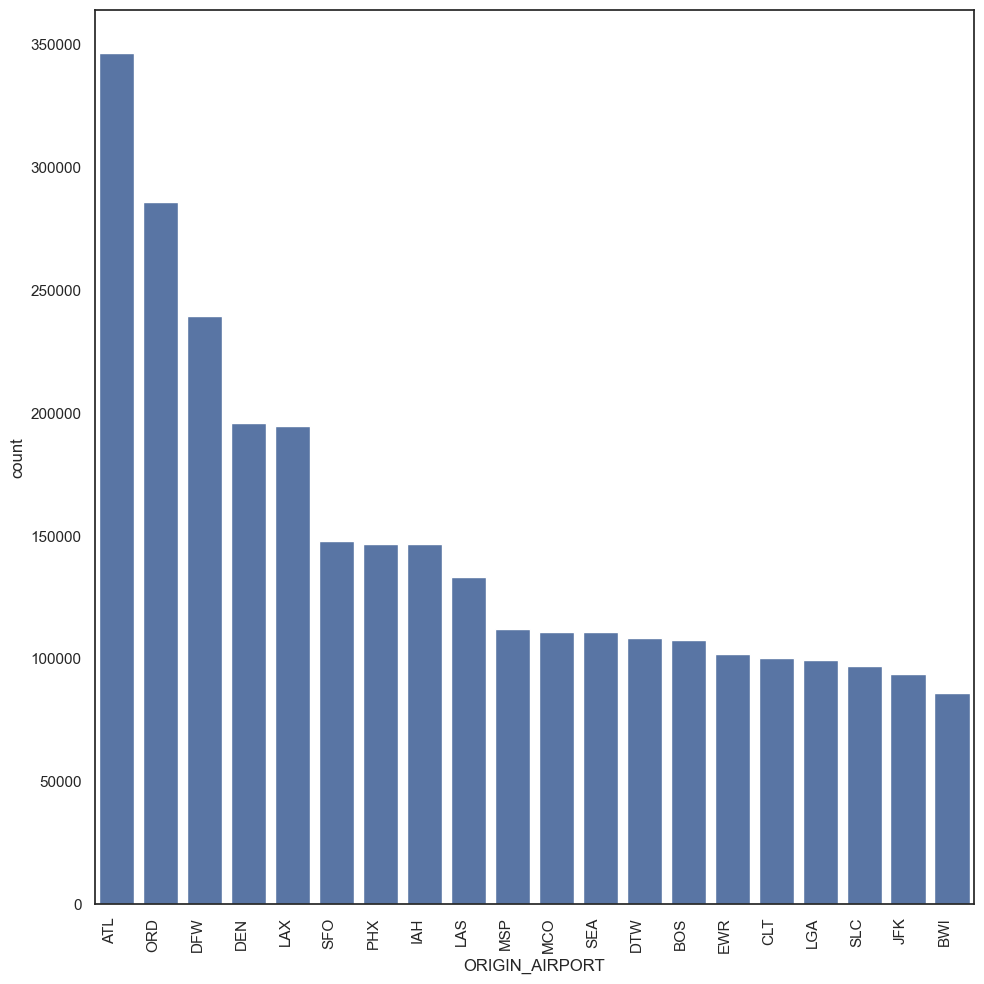

In [47]:
import warnings

# Uyarıları gizle
warnings.simplefilter(action='ignore', category=FutureWarning)

print("en çok uçuşun kalktığı ilk 20 havaalanını ORIGIN_AIRPORT")
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=df_flights['ORIGIN_AIRPORT'], data = df_flights,
              order=df_flights['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

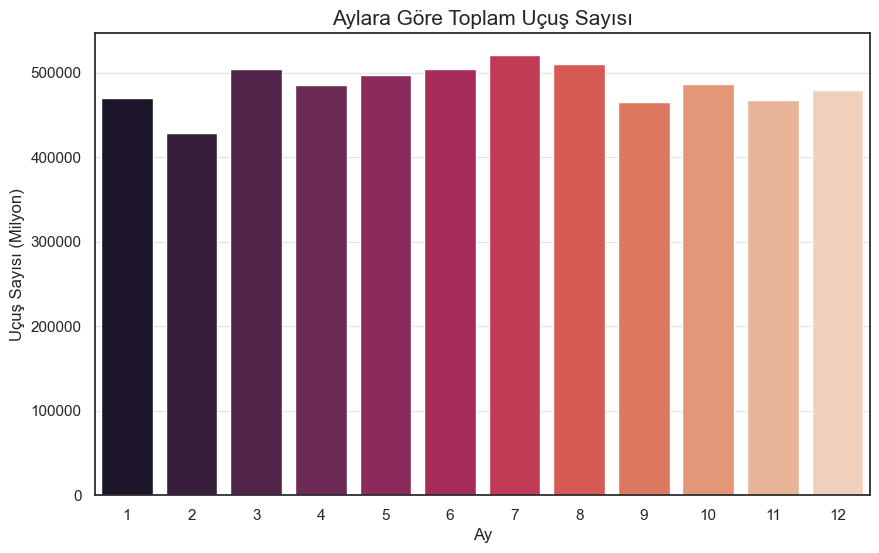

In [48]:
import warnings

# Uyarıları gizle
warnings.simplefilter(action='ignore', category=FutureWarning)

# Her ay için uçuş sayısını hesaplama
monthly_flights = df_flights['MONTH'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_flights.index, y=monthly_flights.values, palette="rocket")
plt.title('Aylara Göre Toplam Uçuş Sayısı', fontsize=15)
plt.xlabel('Ay', fontsize=12)
plt.ylabel('Uçuş Sayısı (Milyon)', fontsize=12)
plt.xticks(ticks=range(12))
plt.grid(axis='y', alpha=0.5)
plt.show()

In [49]:
# Her havayolu için ortalama uçuş mesafesi
airline_distance = df_flights.groupby('AIRLINE')['DISTANCE'].mean().sort_values(ascending=False)

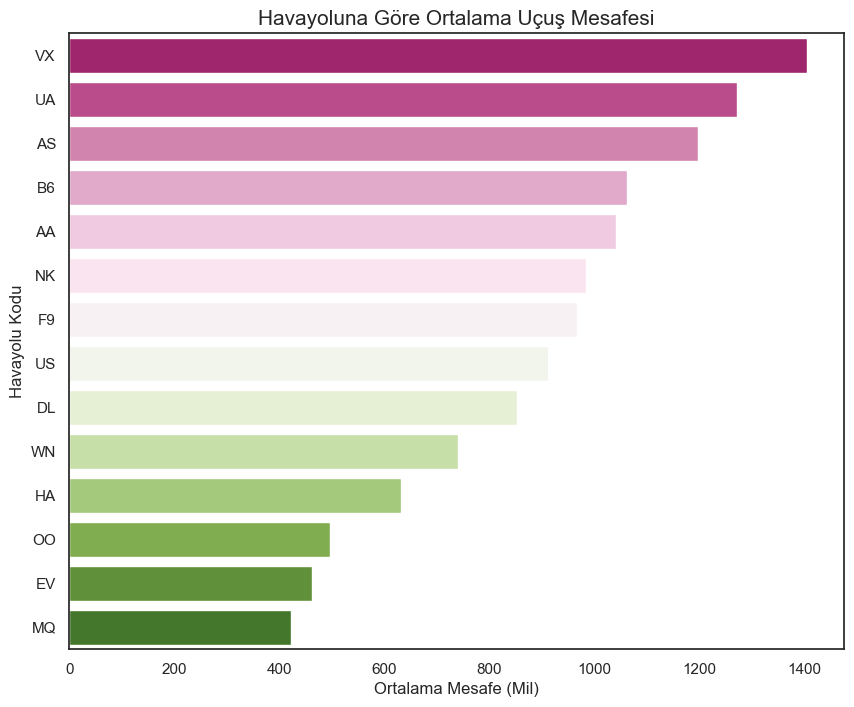

In [50]:
import warnings

# Uyarıları gizle
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(10, 8))
sns.barplot(y=airline_distance.index, x=airline_distance.values, palette="PiYG")
plt.title('Havayoluna Göre Ortalama Uçuş Mesafesi', fontsize=15)
plt.xlabel('Ortalama Mesafe (Mil)', fontsize=12)
plt.ylabel('Havayolu Kodu', fontsize=12)
plt.show()

      FİNAL MODEL KARŞILAŞTIRMASI (TÜM METRİKLER)
      (Logistic Regression vs Naive Bayes)
Model Eğitiliyor: Logistic Regression...
Model Eğitiliyor: Naive Bayes...

----------------------------------------------------------------------------------------------------
DETAYLI METRİK TABLOSU (Tüm İstenen Metrikler Dahil)
----------------------------------------------------------------------------------------------------
                     Accuracy  ROC AUC  PR AUC  F1 Score  Recall  Precision  \
Model                                                                         
Logistic Regression     55.93    61.56   24.36     33.87   63.03      23.16   
Naive Bayes             82.09    50.77   18.17      0.00    0.00       0.00   

                     MAE (Hata)  
Model                            
Logistic Regression        0.44  
Naive Bayes                0.18  
----------------------------------------------------------------------------------------------------


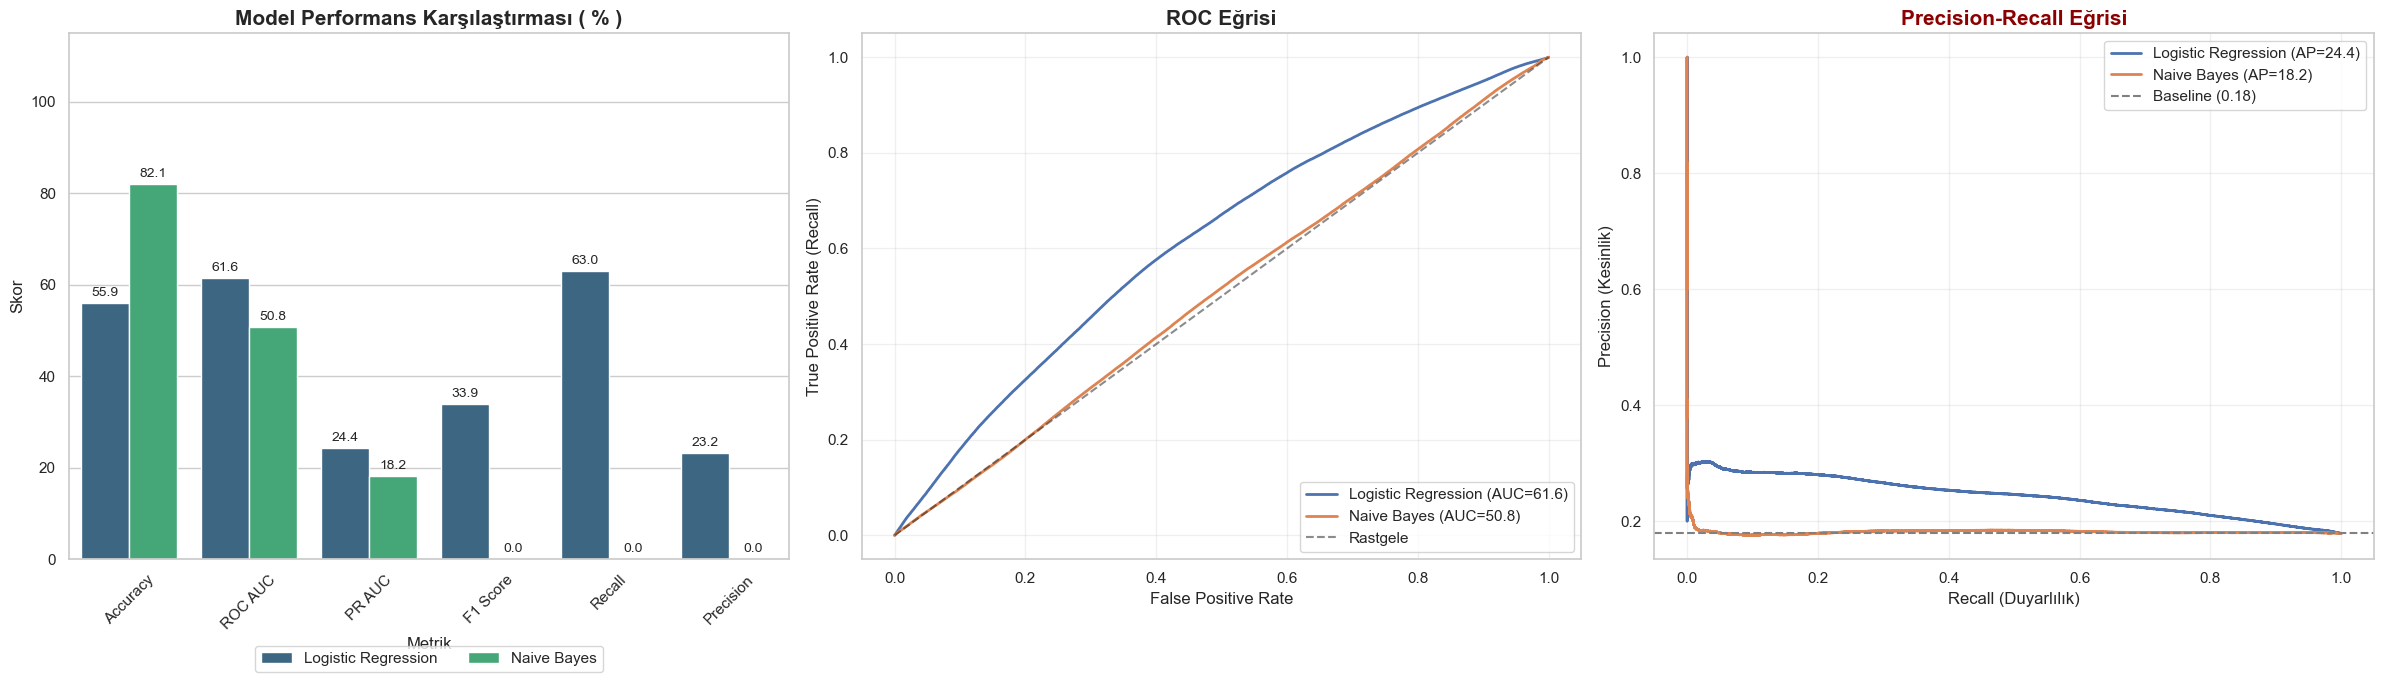

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, f1_score, recall_score, precision_score, 
                             roc_auc_score, average_precision_score, mean_absolute_error,
                             roc_curve, precision_recall_curve)

# Görselleştirme Ayarları
sns.set(style="whitegrid")

# Veriler hafızadaysa başla
if 'X_train_encoded' in locals():
    print("=" * 90)
    print("      FİNAL MODEL KARŞILAŞTIRMASI (TÜM METRİKLER)")
    print("      (Logistic Regression vs Naive Bayes)")
    print("=" * 90)

    # 1. Modellerin Tanımlanması
    models = {
        "Logistic Regression": LogisticRegression(solver='saga', class_weight='balanced', max_iter=100, n_jobs=-1, random_state=42),
        "Naive Bayes": GaussianNB(var_smoothing=1e-2)
    }

    results = []
    roc_curves = {} 
    pr_curves = {}

    # 2. Eğitim ve Test Döngüsü
    for name, model in models.items():
        print(f"Model Eğitiliyor: {name}...")
        try:
            # Eğitim
            model.fit(X_train_encoded, y_train)
            
            # Tahminler
            y_pred = model.predict(X_test_encoded)
            
            # Olasılıklar
            if hasattr(model, "predict_proba"):
                y_prob = model.predict_proba(X_test_encoded)[:, 1]
            else:
                y_prob = y_pred 

            # --- METRİK HESAPLAMALARI ---
            acc = accuracy_score(y_test, y_pred) * 100
            f1 = f1_score(y_test, y_pred, average='binary') * 100
            recall = recall_score(y_test, y_pred, average='binary') * 100
            precision = precision_score(y_test, y_pred, average='binary') * 100
            roc_auc = roc_auc_score(y_test, y_prob) * 100
            pr_auc = average_precision_score(y_test, y_prob) * 100 
            mae = mean_absolute_error(y_test, y_pred)
            
            results.append({
                "Model": name,
                "Accuracy": acc,
                "ROC AUC": roc_auc,
                "PR AUC": pr_auc,
                "F1 Score": f1,
                "Recall": recall,     # Eklenen Metrik
                "Precision": precision, # Eklenen Metrik
                "MAE (Hata)": mae
            })
            
            # Eğri Verilerini Kaydet
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            roc_curves[name] = (fpr, tpr, roc_auc)
            
            prec, rec, _ = precision_recall_curve(y_test, y_prob)
            pr_curves[name] = (prec, rec, pr_auc)
            
        except Exception as e:
            print(f"Hata ({name}): {e}")

    # 3. Sonuç Tablosu
    if results:
        df_results = pd.DataFrame(results)
        # MAE hariç diğerlerini sıralama için kullanabiliriz
        df_results = df_results.set_index("Model").sort_values(by="PR AUC", ascending=False)
        
        print("\n" + "-"*100)
        print("DETAYLI METRİK TABLOSU (Tüm İstenen Metrikler Dahil)")
        print("-" * 100)
        print(df_results.round(2))
        print("-" * 100)

        # 4. Görselleştirme (3'lü Panel)
        fig, axes = plt.subplots(1, 3, figsize=(24, 7))

        # --- Grafik A: Tüm Metriklerin Karşılaştırması (Bar Plot) ---
        df_melted = df_results.reset_index().melt(id_vars="Model", var_name="Metrik", value_name="Skor")
        
        # İstenen tüm metrikleri grafiğe dahil ediyoruz
        plot_metrics = ["Accuracy", "ROC AUC", "PR AUC", "F1 Score", "Recall", "Precision"] 
        df_plot = df_melted[df_melted["Metrik"].isin(plot_metrics)]
        
        sns.barplot(x="Metrik", y="Skor", hue="Model", data=df_plot, ax=axes[0], palette="viridis")
        axes[0].set_title("Model Performans Karşılaştırması ( % )", fontsize=15, fontweight='bold')
        axes[0].set_ylim(0, 115)
        axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
        axes[0].tick_params(axis='x', rotation=45)
        
        for container in axes[0].containers:
            axes[0].bar_label(container, fmt='%.1f', padding=3, fontsize=10)

        # --- Grafik B: ROC Eğrileri ---
        for name, (fpr, tpr, auc_score) in roc_curves.items():
            axes[1].plot(fpr, tpr, label=f'{name} (AUC={auc_score:.1f})', linewidth=2)
        axes[1].plot([0, 1], [0, 1], 'k--', label='Rastgele', alpha=0.5)
        axes[1].set_title("ROC Eğrisi", fontsize=15, fontweight='bold')
        axes[1].set_xlabel("False Positive Rate")
        axes[1].set_ylabel("True Positive Rate (Recall)")
        axes[1].legend(loc="lower right")
        axes[1].grid(True, alpha=0.3)

        # --- Grafik C: Precision-Recall Eğrileri ---
        for name, (prec, rec, auc_score) in pr_curves.items():
            axes[2].plot(rec, prec, label=f'{name} (AP={auc_score:.1f})', linewidth=2)
        
        baseline = y_test.mean()
        axes[2].axhline(y=baseline, color='gray', linestyle='--', label=f'Baseline ({baseline:.2f})')
        axes[2].set_title("Precision-Recall Eğrisi", fontsize=15, fontweight='bold', color='darkred')
        axes[2].set_xlabel("Recall (Duyarlılık)")
        axes[2].set_ylabel("Precision (Kesinlik)")
        axes[2].legend(loc="upper right")
        axes[2].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

else:
    print("Hata: 'X_train_encoded' verisi bulunamadı. Lütfen veri yükleme ve encoding işlemlerini yapınız.")

In [53]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 619.0 kB/s eta 0:00:00a 0:00:01


In [54]:
!brew install libomp

==> Auto-updating Homebrew...
Adjust how often this is run with `$HOMEBREW_AUTO_UPDATE_SECS` or disable with
`$HOMEBREW_NO_AUTO_UPDATE=1`. Hide these hints with `$HOMEBREW_NO_ENV_HINTS=1` (see `man brew`).
==> Homebrew collects anonymous analytics.
Read the analytics documentation (and how to opt-out) here:
  https://docs.brew.sh/Analytics
No analytics have been recorded yet (nor will be during this `brew` run).

==> Homebrew is run entirely by unpaid volunteers. Please consider donating:
  https://github.com/Homebrew/brew#donations

==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
carl: Calendar for the command-line
custom-install: Install CIA files directly to Nintendo 3DS SD card
flecs: Fast entity component system for C & C++
fresh-editor: Text editor for your terminal: easy, powerful and fast
git-pages: Scalable static site server for Git forges
git-pages-cli: Tool for publishing a site to a git-pages server
goat: General purpose AT Pr

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, 
                             average_precision_score, mean_absolute_error)
import re
import time

# Sonuçları toplamak için boş bir liste oluşturuyoruz
advanced_results = []

# Model performansını ölçen yardımcı fonksiyon
def evaluate_model_custom(model, X_tr, y_tr, X_te, y_te, model_name, method_name):
    start_time = time.time()
    print(f"Eğitiliyor: {model_name} ({method_name})...")
    
    # Modeli eğit
    model.fit(X_tr, y_tr)
    
    # Tahmin yap
    y_pred = model.predict(X_te)
    
    # Olasılık değerlerini al (AUC metrikleri için)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_te)[:, 1]
    else:
        y_prob = y_pred
        
    elapsed = time.time() - start_time
    print(f"Tamamlandı ({elapsed:.1f} sn).")
    
    # Metrikleri hesapla ve sözlük olarak döndür
    return {
        "Model": model_name,
        "Yöntem": method_name,
        "Accuracy": accuracy_score(y_te, y_pred) * 100,
        "F1 Score": f1_score(y_te, y_pred, average='binary') * 100,
        "ROC AUC": roc_auc_score(y_te, y_prob) * 100,
        "PR AUC": average_precision_score(y_te, y_prob) * 100,
        "MAE": mean_absolute_error(y_te, y_pred)
    }

print("Kurulum tamamlandı. Fonksiyonlar hazır.")

Kurulum tamamlandı. Fonksiyonlar hazır.


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- 1. Veri Yükleme ve Fonksiyon Tanımları ---

# Dosya yolları (Kendi bilgisayarınızdaki yollarla aynı olduğundan emin olun)
BASE_PATH = r'/Users/oguzhanozdemir/Desktop/veri/dataSet'
path_flights = f'{BASE_PATH}/flights.csv' 
path_airports = f'{BASE_PATH}/airports.csv'
path_airlines = f'{BASE_PATH}/airlines.csv'

def load_data(path_flights, path_airports, path_airlines):
    try:
        df_flights = pd.read_csv(path_flights, low_memory=False)
        df_airports = pd.read_csv(path_airports)
        df_airlines = pd.read_csv(path_airlines)
        return df_flights, df_airports, df_airlines
    except Exception as e:
        print(f"Hata: {e}")
        return None, None, None

def preprocess_pipeline(df_flights_split, df_airlines_full, df_airports_full):
    # Birleştirme
    df = pd.merge(df_flights_split, df_airlines_full, left_on='AIRLINE', right_on='IATA_CODE', how='left')
    df.drop('IATA_CODE', axis=1, inplace=True)
    df = pd.merge(df, df_airports_full.add_suffix('_ORIGIN'), left_on='ORIGIN_AIRPORT', right_on='IATA_CODE_ORIGIN', how='left')
    df.drop(['IATA_CODE_ORIGIN'], axis=1, inplace=True)
    df = pd.merge(df, df_airports_full.add_suffix('_DEST'), left_on='DESTINATION_AIRPORT', right_on='IATA_CODE_DEST', how='left')
    df.drop(['IATA_CODE_DEST'], axis=1, inplace=True)

    # Temizlik
    high_null_cols = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
    df.drop(columns=high_null_cols, inplace=True, errors='ignore')
    df = df[(df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)].copy()
    df.drop(columns=['CANCELLED', 'DIVERTED'], inplace=True, errors='ignore')

    # Hedef Değişken ve Yeni Özellikler
    df['IS_DELAYED'] = (df['ARRIVAL_DELAY'] > 15).astype(int)
    df['SCHEDULED_HOUR'] = df['SCHEDULED_DEPARTURE'].astype(str).str.zfill(4).str[:2].astype(int)
    bins = [-1, 5, 11, 16, 20, 23]
    labels = ['Gece (00-05)', 'Sabah (06-11)', 'Öğle (12-16)', 'Akşam (17-20)', 'Gece Yarısı (21-23)']
    df['TIME_OF_DAY'] = pd.cut(df['SCHEDULED_HOUR'], bins=bins, labels=labels, ordered=False)

    # Gereksiz Sütunların Silinmesi
    silinecek_sutunlar = [
        'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
        'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN',
        'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'YEAR', 'COUNTRY_ORIGIN',
        'COUNTRY_DEST', 'TAIL_NUMBER', 'FLIGHT_NUMBER', 'AIRLINE_NAME',
        'AIRPORT_ORIGIN', 'CITY_ORIGIN', 'STATE_ORIGIN', 'LATITUDE_ORIGIN',
        'LONGITUDE_ORIGIN', 'AIRPORT_DEST', 'CITY_DEST', 'STATE_DEST',
        'LATITUDE_DEST', 'LONGITUDE_DEST', 'SCHEDULED_DEPARTURE', 
        'SCHEDULED_HOUR', 'SCHEDULED_ARRIVAL'
    ]
    df.drop(columns=silinecek_sutunlar, inplace=True, errors='ignore')
    df.dropna(inplace=True)
    return df

def encode_features(X_train, X_test, y_train):
    target_encode_cols = ['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
    ohe_cols = ['AIRLINE', 'TIME_OF_DAY']

    train_data_temp = X_train.copy()
    train_data_temp['IS_DELAYED'] = y_train

    for col in target_encode_cols:
        mapping = train_data_temp.groupby(col)['IS_DELAYED'].mean()
        X_train[col + '_ENCODED'] = X_train[col].map(mapping)
        X_test[col + '_ENCODED'] = X_test[col].map(mapping)
        global_mean = y_train.mean()
        X_train[col + '_ENCODED'].fillna(global_mean, inplace=True)
        X_test[col + '_ENCODED'].fillna(global_mean, inplace=True)
        
    X_train = pd.get_dummies(X_train, columns=ohe_cols, prefix=ohe_cols, dtype=int)
    X_test = pd.get_dummies(X_test, columns=ohe_cols, prefix=ohe_cols, dtype=int)

    train_cols = X_train.columns
    X_test = X_test.reindex(columns=train_cols, fill_value=0)

    X_train.drop(columns=target_encode_cols, inplace=True)
    X_test.drop(columns=target_encode_cols, inplace=True)
    return X_train, X_test

# --- 2. İşlemleri Çalıştırma ---

print("Veriler yükleniyor...")
df_flights, df_airports, df_airlines = load_data(path_flights, path_airports, path_airlines)

if df_flights is not None:
    print("Veri bölünüyor...")
    flights_train, flights_test = train_test_split(df_flights, test_size=0.2, random_state=42)
    
    if 'AIRLINE' in df_airlines.columns:
        df_airlines.rename(columns={'AIRLINE': 'AIRLINE_NAME'}, inplace=True)

    print("Pre-processing yapılıyor...")
    train_df = preprocess_pipeline(flights_train, df_airlines, df_airports)
    test_df = preprocess_pipeline(flights_test, df_airlines, df_airports)

    # X ve y ayırma
    X_train = train_df.drop('IS_DELAYED', axis=1)
    y_train = train_df['IS_DELAYED']
    X_test = test_df.drop('IS_DELAYED', axis=1)
    y_test = test_df['IS_DELAYED']

    print("Encoding yapılıyor (X_train_encoded oluşturuluyor)...")
    X_train_encoded, X_test_encoded = encode_features(X_train, X_test, y_train)
    
    print(f"Başarılı! X_train_encoded boyutu: {X_train_encoded.shape}")
else:
    print("Veri yüklenemedi!")

Veriler yükleniyor...
Veri bölünüyor...
Pre-processing yapılıyor...
Encoding yapılıyor (X_train_encoded oluşturuluyor)...


/var/folders/1s/x5d2p1vx1_1g1cny2klfq8980000gn/T/ipykernel_29033/1165245274.py:73: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col + '_ENCODED'].fillna(global_mean, inplace=True)
/var/folders/1s/x5d2p1vx1_1g1cny2klfq8980000gn/T/ipykernel_29033/1165245274.py:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

Başarılı! X_train_encoded boyutu: (4571137, 26)


In [1]:
# Sayısal verileri küçültme fonksiyonu
def optimize_memory(df):
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type == 'float64':
            df[col] = df[col].astype('float32') # 64 bit yerine 32 bit kullan
        if col_type == 'int64':
            df[col] = df[col].astype('int32')
    return df

# Kullanımı:
# df_flights = optimize_memory(df_flights)

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import gc # RAM temizliği için

# --- 1. Veri Yükleme ve RAM Optimizasyonu ---
BASE_PATH = r'/Users/oguzhanozdemir/Desktop/veri/dataSet'
path_flights = f'{BASE_PATH}/flights.csv' 
path_airports = f'{BASE_PATH}/airports.csv'
path_airlines = f'{BASE_PATH}/airlines.csv'

# Veri tiplerini küçülterek yükleme (RAM şişmesini önler)
def load_optimized_data():
    print("Veriler yükleniyor...")
    # Sadece gerekli sütunları ve daha küçük veri tipleriyle yükleyelim
    df_flights = pd.read_csv(path_flights, low_memory=False)
    
    # Float64 -> Float32 dönüşümü (Yarı yarıya yer kazandırır)
    for col in df_flights.select_dtypes(include=['float64']).columns:
        df_flights[col] = df_flights[col].astype('float32')
        
    # Int64 -> Int32 dönüşümü
    for col in df_flights.select_dtypes(include=['int64']).columns:
        df_flights[col] = df_flights[col].astype('int32')

    df_airports = pd.read_csv(path_airports)
    df_airlines = pd.read_csv(path_airlines)
    
    return df_flights, df_airports, df_airlines

# Veriyi yükle
df_flights, df_airports, df_airlines = load_optimized_data()

# --- 2. Train/Test Bölme İşlemi ---
if df_flights is not None:
    print(f"Veri yüklendi. Boyut: {df_flights.shape}")
    
    # Train/Test olarak böl
    # Stratify kullanmıyoruz çünkü hedef değişken henüz oluşmamış olabilir
    flights_train, flights_test = train_test_split(df_flights, test_size=0.2, random_state=42)
    print("Train/Test ayrımı yapıldı.")

    # --- 3. RAM Temizliği (KRİTİK ADIM) ---
    # Artık flights_train ve flights_test var, ana büyük tabloya ihtiyacımız yok.
    del df_flights 
    gc.collect() # Çöp toplayıcıyı çalıştırarak RAM'i boşalt
    print("Ana veri seti silindi, RAM temizlendi.")
    
else:
    print("Veri yüklenemedi!")

Veriler yükleniyor...
Veri yüklendi. Boyut: (5819079, 31)
Train/Test ayrımı yapıldı.
Ana veri seti silindi, RAM temizlendi.


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- 1. Veri Yükleme ve Fonksiyon Tanımları ---

# Dosya yolları (Kendi bilgisayarınızdaki yollarla aynı olduğundan emin olun)
BASE_PATH = r'/Users/oguzhanozdemir/Desktop/veri/dataSet'
path_flights = f'{BASE_PATH}/flights.csv' 
path_airports = f'{BASE_PATH}/airports.csv'
path_airlines = f'{BASE_PATH}/airlines.csv'

def load_data(path_flights, path_airports, path_airlines):
    try:
        df_flights = pd.read_csv(path_flights, low_memory=False)
        df_airports = pd.read_csv(path_airports)
        df_airlines = pd.read_csv(path_airlines)
        return df_flights, df_airports, df_airlines
    except Exception as e:
        print(f"Hata: {e}")
        return None, None, None

def preprocess_pipeline(df_flights_split, df_airlines_full, df_airports_full):
    # Birleştirme
    df = pd.merge(df_flights_split, df_airlines_full, left_on='AIRLINE', right_on='IATA_CODE', how='left')
    df.drop('IATA_CODE', axis=1, inplace=True)
    df = pd.merge(df, df_airports_full.add_suffix('_ORIGIN'), left_on='ORIGIN_AIRPORT', right_on='IATA_CODE_ORIGIN', how='left')
    df.drop(['IATA_CODE_ORIGIN'], axis=1, inplace=True)
    df = pd.merge(df, df_airports_full.add_suffix('_DEST'), left_on='DESTINATION_AIRPORT', right_on='IATA_CODE_DEST', how='left')
    df.drop(['IATA_CODE_DEST'], axis=1, inplace=True)

    # Temizlik
    high_null_cols = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
    df.drop(columns=high_null_cols, inplace=True, errors='ignore')
    df = df[(df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)].copy()
    df.drop(columns=['CANCELLED', 'DIVERTED'], inplace=True, errors='ignore')

    # Hedef Değişken ve Yeni Özellikler
    df['IS_DELAYED'] = (df['ARRIVAL_DELAY'] > 15).astype(int)
    df['SCHEDULED_HOUR'] = df['SCHEDULED_DEPARTURE'].astype(str).str.zfill(4).str[:2].astype(int)
    bins = [-1, 5, 11, 16, 20, 23]
    labels = ['Gece (00-05)', 'Sabah (06-11)', 'Öğle (12-16)', 'Akşam (17-20)', 'Gece Yarısı (21-23)']
    df['TIME_OF_DAY'] = pd.cut(df['SCHEDULED_HOUR'], bins=bins, labels=labels, ordered=False)

    # Gereksiz Sütunların Silinmesi
    silinecek_sutunlar = [
        'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
        'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN',
        'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'YEAR', 'COUNTRY_ORIGIN',
        'COUNTRY_DEST', 'TAIL_NUMBER', 'FLIGHT_NUMBER', 'AIRLINE_NAME',
        'AIRPORT_ORIGIN', 'CITY_ORIGIN', 'STATE_ORIGIN', 'LATITUDE_ORIGIN',
        'LONGITUDE_ORIGIN', 'AIRPORT_DEST', 'CITY_DEST', 'STATE_DEST',
        'LATITUDE_DEST', 'LONGITUDE_DEST', 'SCHEDULED_DEPARTURE', 
        'SCHEDULED_HOUR', 'SCHEDULED_ARRIVAL'
    ]
    df.drop(columns=silinecek_sutunlar, inplace=True, errors='ignore')
    df.dropna(inplace=True)
    return df

def encode_features(X_train, X_test, y_train):
    target_encode_cols = ['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
    ohe_cols = ['AIRLINE', 'TIME_OF_DAY']

    train_data_temp = X_train.copy()
    train_data_temp['IS_DELAYED'] = y_train

    for col in target_encode_cols:
        mapping = train_data_temp.groupby(col)['IS_DELAYED'].mean()
        X_train[col + '_ENCODED'] = X_train[col].map(mapping)
        X_test[col + '_ENCODED'] = X_test[col].map(mapping)
        global_mean = y_train.mean()
        X_train[col + '_ENCODED'].fillna(global_mean, inplace=True)
        X_test[col + '_ENCODED'].fillna(global_mean, inplace=True)
        
    X_train = pd.get_dummies(X_train, columns=ohe_cols, prefix=ohe_cols, dtype=int)
    X_test = pd.get_dummies(X_test, columns=ohe_cols, prefix=ohe_cols, dtype=int)

    train_cols = X_train.columns
    X_test = X_test.reindex(columns=train_cols, fill_value=0)

    X_train.drop(columns=target_encode_cols, inplace=True)
    X_test.drop(columns=target_encode_cols, inplace=True)
    return X_train, X_test

# --- 2. İşlemleri Çalıştırma ---

print("Veriler yükleniyor...")
df_flights, df_airports, df_airlines = load_data(path_flights, path_airports, path_airlines)

if df_flights is not None:
    print("Veri bölünüyor...")
    flights_train, flights_test = train_test_split(df_flights, test_size=0.2, random_state=42)
    
    if 'AIRLINE' in df_airlines.columns:
        df_airlines.rename(columns={'AIRLINE': 'AIRLINE_NAME'}, inplace=True)

    print("Pre-processing yapılıyor...")
    train_df = preprocess_pipeline(flights_train, df_airlines, df_airports)
    test_df = preprocess_pipeline(flights_test, df_airlines, df_airports)

    # X ve y ayırma
    X_train = train_df.drop('IS_DELAYED', axis=1)
    y_train = train_df['IS_DELAYED']
    X_test = test_df.drop('IS_DELAYED', axis=1)
    y_test = test_df['IS_DELAYED']

    print("Encoding yapılıyor (X_train_encoded oluşturuluyor)...")
    X_train_encoded, X_test_encoded = encode_features(X_train, X_test, y_train)
    
    print(f"Başarılı! X_train_encoded boyutu: {X_train_encoded.shape}")
else:
    print("Veri yüklenemedi!")

Veriler yükleniyor...
Veri bölünüyor...
Pre-processing yapılıyor...
Encoding yapılıyor (X_train_encoded oluşturuluyor)...


/var/folders/1s/x5d2p1vx1_1g1cny2klfq8980000gn/T/ipykernel_29260/1165245274.py:73: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col + '_ENCODED'].fillna(global_mean, inplace=True)
/var/folders/1s/x5d2p1vx1_1g1cny2klfq8980000gn/T/ipykernel_29260/1165245274.py:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

Başarılı! X_train_encoded boyutu: (4571137, 26)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, 
                             average_precision_score, mean_absolute_error)
import re
import time

# Sonuçları toplamak için boş bir liste oluşturuyoruz
advanced_results = []

# Model performansını ölçen yardımcı fonksiyon
def evaluate_model_custom(model, X_tr, y_tr, X_te, y_te, model_name, method_name):
    start_time = time.time()
    print(f"Eğitiliyor: {model_name} ({method_name})...")
    
    # Modeli eğit
    model.fit(X_tr, y_tr)
    
    # Tahmin yap
    y_pred = model.predict(X_te)
    
    # Olasılık değerlerini al (AUC metrikleri için)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_te)[:, 1]
    else:
        y_prob = y_pred
        
    elapsed = time.time() - start_time
    print(f"Tamamlandı ({elapsed:.1f} sn).")
    
    # Metrikleri hesapla ve sözlük olarak döndür
    return {
        "Model": model_name,
        "Yöntem": method_name,
        "Accuracy": accuracy_score(y_te, y_pred) * 100,
        "F1 Score": f1_score(y_te, y_pred, average='binary') * 100,
        "ROC AUC": roc_auc_score(y_te, y_prob) * 100,
        "PR AUC": average_precision_score(y_te, y_prob) * 100,
        "MAE": mean_absolute_error(y_te, y_pred)
    }

print("Kurulum tamamlandı. Fonksiyonlar hazır.")

Kurulum tamamlandı. Fonksiyonlar hazır.


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import gc # Garbage Collector (Bellek Temizleyici)

# --- 1. AYARLAR ---
BASE_PATH = r'/Users/oguzhanozdemir/Desktop/veri/dataSet'
SAMPLE_RATIO = 0.15  # Verinin sadece %15'ini alacağız (Yaklaşık 800.000 satır)
# RAM sorunu devam ederse bu oranı 0.05 veya 0.10 yapabilirsiniz.

print(f"İşlem başlıyor... Verinin %{SAMPLE_RATIO*100}'i kullanılacak.")

# --- 2. VERİ YÜKLEME VE ÖRNEKLEME ---
def load_and_sample_data():
    # Sadece gerekli sütunları belirleyelim (RAM tasarrufu)
    cols_to_load = [
        'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
        'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 
        'WHEELS_OFF', 'DISTANCE', 'DIVERTED', 'CANCELLED', 'ARRIVAL_DELAY'
    ]
    
    try:
        # Veriyi parça parça okumak yerine tipleri optimize ederek okuyoruz
        df = pd.read_csv(
            f'{BASE_PATH}/flights.csv', 
            usecols=cols_to_load,
            low_memory=False
        )
        
        # Hemen örneklem alıp ana veriyi küçültüyoruz
        df = df.sample(frac=SAMPLE_RATIO, random_state=42)
        print(f"Örneklem alındı. Yeni boyut: {df.shape}")
        
        # Ek dosyalar
        df_airports = pd.read_csv(f'{BASE_PATH}/airports.csv')
        df_airlines = pd.read_csv(f'{BASE_PATH}/airlines.csv')
        
        return df, df_airports, df_airlines
        
    except Exception as e:
        print(f"Hata oluştu: {e}")
        return None, None, None

df_flights, df_airports, df_airlines = load_and_sample_data()

# --- 3. ÖN İŞLEME (PREPROCESSING) ---
if df_flights is not None:
    # Gereksiz uçuşları temizle
    df_flights = df_flights[(df_flights['CANCELLED'] == 0) & (df_flights['DIVERTED'] == 0)]
    
    # Hedef Değişken (Gecikme > 15 dk)
    df_flights['IS_DELAYED'] = (df_flights['ARRIVAL_DELAY'] > 15).astype(np.int8)
    
    # Zaman Özelliği
    df_flights['SCHEDULED_HOUR'] = df_flights['SCHEDULED_DEPARTURE'].astype(str).str.zfill(4).str[:2].astype(int)
    bins = [-1, 5, 11, 16, 20, 23]
    labels = ['Gece', 'Sabah', 'Ogle', 'Aksam', 'GeceYarisi'] # Türkçe karakterden kaçındık (LightGBM için)
    df_flights['TIME_OF_DAY'] = pd.cut(df_flights['SCHEDULED_HOUR'], bins=bins, labels=labels, ordered=False)

    # Birleştirme (Merge) işlemlerini optimize edelim
    # Sadece gerekli ID'leri tutarak birleştirme yapıyoruz
    if 'AIRLINE' in df_airlines.columns:
        df_airlines.rename(columns={'AIRLINE': 'AIRLINE_NAME'}, inplace=True)
        
    # Havalimanı verilerini birleştirmiyoruz, sadece kodlarını kullanacağız (RAM tasarrufu)
    # Target Encoding bu işi görecek zaten.
    
    # Gereksiz sütunları at
    drop_cols = [
        'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 
        'ARRIVAL_DELAY', 'CANCELLED', 'DIVERTED', 'SCHEDULED_DEPARTURE', 'SCHEDULED_HOUR'
    ]
    df_flights.drop(columns=drop_cols, inplace=True, errors='ignore')
    
    # Eksik verileri at
    df_flights.dropna(inplace=True)
    
    print("Ön işleme tamamlandı.")

    # --- 4. ENCODING (RAM DOSTU YÖNTEM) ---
    
    # Target Encoding (Origin ve Dest için)
    # Bu yöntem One-Hot Encoding'e göre çok daha az bellek harcar
    for col in ['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']:
        means = df_flights.groupby(col)['IS_DELAYED'].mean()
        df_flights[col + '_ENCODED'] = df_flights[col].map(means).astype(np.float32) # float32 kullanarak yer kazan
        # Yeni veride (test) bilinmeyen havalimanı gelirse genel ortalamayı ata
        global_mean = df_flights['IS_DELAYED'].mean()
        df_flights[col + '_ENCODED'].fillna(global_mean, inplace=True)
    
    # Bu sütunların orijinallerini at
    df_flights.drop(columns=['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], inplace=True)

    # Label Encoding (Kategorik veriler için)
    # One-Hot Encoding yerine Label Encoding veya get_dummies (sparse) kullanacağız
    # LightGBM ve Tree modelleri Label Encoding ile de iyi çalışır
    le = LabelEncoder()
    cat_cols = ['AIRLINE', 'TIME_OF_DAY']
    for col in cat_cols:
        df_flights[col] = df_flights[col].astype(str) # Garanti olsun diye string yap
        df_flights[col] = le.fit_transform(df_flights[col])
        
    # Veri tiplerini küçült (RAM Optimizasyonu)
    for col in df_flights.columns:
        if df_flights[col].dtype == 'float64':
            df_flights[col] = df_flights[col].astype('float32')
        if df_flights[col].dtype == 'int64':
            df_flights[col] = df_flights[col].astype('int32')

    print("Encoding ve optimizasyon tamamlandı.")

    # --- 5. TRAIN/TEST AYIRMA ---
    X = df_flights.drop('IS_DELAYED', axis=1)
    y = df_flights['IS_DELAYED']
    
    X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Büyük dataframe'i hafızadan siliyoruz
    del df_flights
    del df_airports
    del df_airlines
    gc.collect()
    
    print(f"Eğitim seti boyutu: {X_train_encoded.shape}")
    print(f"Test seti boyutu: {X_test_encoded.shape}")
    print("RAM temizlendi. Model eğitimine geçebilirsiniz.")

else:
    print("Veri yüklenemedi. Dosya yollarını kontrol edin.")

İşlem başlıyor... Verinin %15.0'i kullanılacak.
Örneklem alındı. Yeni boyut: (872862, 15)
Ön işleme tamamlandı.


/var/folders/1s/x5d2p1vx1_1g1cny2klfq8980000gn/T/ipykernel_29369/921432098.py:90: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_flights[col + '_ENCODED'].fillna(global_mean, inplace=True)
/var/folders/1s/x5d2p1vx1_1g1cny2klfq8980000gn/T/ipykernel_29369/921432098.py:90: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

Encoding ve optimizasyon tamamlandı.
Eğitim seti boyutu: (685721, 8)
Test seti boyutu: (171431, 8)
RAM temizlendi. Model eğitimine geçebilirsiniz.


In [6]:
# Gerekli tüm kütüphaneleri tekrar yüklüyoruz
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import numpy as np

# Eğer 'evaluate_model_custom' fonksiyonu da hafızada yoksa, onu da tekrar tanımlayalım:
import time
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, 
                             average_precision_score, mean_absolute_error)

def evaluate_model_custom(model, X_tr, y_tr, X_te, y_te, model_name, method_name):
    start_time = time.time()
    print(f"Eğitiliyor: {model_name} ({method_name})...")
    
    # Modeli eğit
    model.fit(X_tr, y_tr)
    
    # Tahmin yap
    y_pred = model.predict(X_te)
    
    # Olasılık değerlerini al (AUC metrikleri için)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_te)[:, 1]
    else:
        y_prob = y_pred
        
    elapsed = time.time() - start_time
    print(f"Tamamlandı ({elapsed:.1f} sn).")
    
    # Metrikleri hesapla ve sözlük olarak döndür
    return {
        "Model": model_name,
        "Yöntem": method_name,
        "Accuracy": accuracy_score(y_te, y_pred) * 100,
        "F1 Score": f1_score(y_te, y_pred, average='binary') * 100,
        "ROC AUC": roc_auc_score(y_te, y_prob) * 100,
        "PR AUC": average_precision_score(y_te, y_prob) * 100,
        "MAE": mean_absolute_error(y_te, y_pred)
    }

# ŞİMDİ MODELİ TEKRAR ÇALIŞTIRABİLİRSİNİZ
if 'X_train_encoded' in locals():
    et_params = {'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
    
    # ExtraTreesClassifier artık tanımlı
    et_base = ExtraTreesClassifier(**et_params)
    
    res_et_base = evaluate_model_custom(
        et_base, X_train_encoded, y_train, X_test_encoded, y_test, 
        "Extra Trees", "Base"
    )
    
    # Sonuçları listeye ekle (Listeyi daha önce oluşturduysanız)
    if 'advanced_results' not in locals():
        advanced_results = []
    
    advanced_results.append(res_et_base)
    print("Extra Trees (Base) sonuçları başarıyla kaydedildi.")
else:
    print("HATA: X_train_encoded verisi bulunamadı. Lütfen önce veri hazırlama kodunu çalıştırın.")

Eğitiliyor: Extra Trees (Base)...
Tamamlandı (14.2 sn).
Extra Trees (Base) sonuçları başarıyla kaydedildi.


In [7]:
import pandas as pd

# Kaydedilen sonuçları kontrol edip ekrana yazdıralım
if 'advanced_results' in locals() and len(advanced_results) > 0:
    df_results = pd.DataFrame(advanced_results)
    print("\n--- MODEL SONUÇLARI ---")
    print(df_results.to_string(index=False))
else:
    print("Henüz sonuç kaydedilmemiş. Lütfen model eğitim kodunu çalıştırın.")


--- MODEL SONUÇLARI ---
      Model Yöntem  Accuracy  F1 Score   ROC AUC    PR AUC      MAE
Extra Trees   Base 81.239099 25.322745 68.072346 31.837578 0.187609


In [10]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler

# --- EKSİK ADIM: FEATURE SELECTION (ÖZELLİK SEÇİMİ) ---

if 'X_train_encoded' in locals():
    print("Özellik seçimi işlemi başlıyor (Mutual Info)...")
    
    # 1. Ölçekleme (Scaling)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_encoded)
    X_test_scaled = scaler.transform(X_test_encoded)
    
    # 2. En iyi 15 özelliği seçme
    # (Veri setiniz büyükse bu işlem 1-2 dakika sürebilir)
    selector = SelectKBest(score_func=mutual_info_classif, k=15)
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    X_test_selected = selector.transform(X_test_scaled)
    
    # Seçilen sütunları görelim
    cols = X_train_encoded.columns
    selected_mask = selector.get_support()
    selected_names = cols[selected_mask].tolist()
    
    print(f"Başarılı! Seçilen {len(selected_names)} özellik: {selected_names}")
    
else:
    print("KRİTİK HATA: 'X_train_encoded' da bulunamadı.")
    print("Lütfen en baştaki 'Veri Yükleme ve Encoding' (Hücre 0) kodunu çalıştırın.")

Özellik seçimi işlemi başlıyor (Mutual Info)...


/opt/anaconda3/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=15 is greater than n_features=8. All the features will be returned.
  warnings.warn(


Başarılı! Seçilen 8 özellik: ['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'DISTANCE', 'TIME_OF_DAY', 'ORIGIN_AIRPORT_ENCODED', 'DESTINATION_AIRPORT_ENCODED']


In [11]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score, mean_absolute_error
import pandas as pd

# --- HÜCRE: Extra Trees Model Eğitimi (Selection Verisiyle) ---

if 'X_train_selected' in locals():
    print("Model Eğitiliyor: Extra Trees (Selection)...")
    
    # 1. Modeli Tanımla
    et_sel = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=42)
    
    # 2. Modeli Eğit (Seçilmiş veri ile)
    et_sel.fit(X_train_selected, y_train)
    
    # 3. Tahmin Yap
    y_pred = et_sel.predict(X_test_selected)
    # Olasılık değerleri (AUC için gerekli)
    y_prob = et_sel.predict_proba(X_test_selected)[:, 1]
    
    # 4. Metrikleri Hesapla
    acc = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred, average='binary') * 100
    auc = roc_auc_score(y_test, y_prob) * 100
    pr_auc = average_precision_score(y_test, y_prob) * 100
    mae = mean_absolute_error(y_test, y_pred)
    
    # 5. Sonuçları Ekrana Yazdır
    print("-" * 40)
    print("EXTRA TREES (FEATURE SELECTION) SONUÇLARI")
    print("-" * 40)
    print(f"Accuracy (Doğruluk) : %{acc:.2f}")
    print(f"F1 Score            : %{f1:.2f}")
    print(f"ROC AUC             : %{auc:.2f}")
    print(f"PR AUC              : %{pr_auc:.2f}")
    print(f"MAE (Hata)          : {mae:.4f}")
    print("-" * 40)

    # Sonuçları daha sonra grafik çizmek için listeye ekleyelim
    # (Eğer liste yoksa oluşturur)
    if 'advanced_results' not in locals():
        advanced_results = []
        
    advanced_results.append({
        "Model": "Extra Trees",
        "Yöntem": "Selection",
        "Accuracy": acc, 
        "ROC AUC": auc, 
        "PR AUC": pr_auc, 
        "F1 Score": f1,
        "MAE": mae
    })
    
else:
    print("HATA: 'X_train_selected' bulunamadı. Lütfen bir önceki Feature Selection hücresini çalıştırdığınızdan emin olun.")

Model Eğitiliyor: Extra Trees (Selection)...
----------------------------------------
EXTRA TREES (FEATURE SELECTION) SONUÇLARI
----------------------------------------
Accuracy (Doğruluk) : %81.25
F1 Score            : %25.40
ROC AUC             : %68.08
PR AUC              : %31.85
MAE (Hata)          : 0.1875
----------------------------------------


In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

# --- HÜCRE: LDA (Boyut İndirgeme) İşlemi ---

if 'X_train_encoded' in locals():
    print("LDA (Boyut İndirgeme) işlemi başlıyor...")
    
    # 1. Ölçekleme (LDA için verilerin aynı ölçekte olması iyidir)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_encoded)
    X_test_scaled = scaler.transform(X_test_encoded)
    
    # 2. LDA Uygulama (n_components=1, çünkü 2 sınıfımız var: 0 ve 1)
    lda = LDA(n_components=1)
    
    X_train_lda = lda.fit_transform(X_train_scaled, y_train)
    X_test_lda = lda.transform(X_test_scaled)
    
    print(f"Başarılı! Veri boyutu indirgendi.")
    print(f"Orijinal Boyut: {X_train_encoded.shape}")
    print(f"LDA Sonrası Boyut: {X_train_lda.shape}")

else:
    print("HATA: 'X_train_encoded' bulunamadı. Lütfen en baştaki veri hazırlama kodunu çalıştırın.")

LDA (Boyut İndirgeme) işlemi başlıyor...
Başarılı! Veri boyutu indirgendi.
Orijinal Boyut: (685721, 8)
LDA Sonrası Boyut: (685721, 1)


In [13]:
# --- HÜCRE: Extra Trees (LDA) Eğitimi ---

if 'X_train_lda' in locals():
    print("Model Eğitiliyor: Extra Trees (LDA)...")
    
    et_lda = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=42)
    
    # Modeli Eğit
    et_lda.fit(X_train_lda, y_train)
    
    # Tahmin
    y_pred = et_lda.predict(X_test_lda)
    y_prob = et_lda.predict_proba(X_test_lda)[:, 1]
    
    # Metrikler
    acc = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred, average='binary') * 100
    auc = roc_auc_score(y_test, y_prob) * 100
    pr_auc = average_precision_score(y_test, y_prob) * 100
    mae = mean_absolute_error(y_test, y_pred)
    
    # Sonuçları Kaydet
    advanced_results.append({
        "Model": "Extra Trees",
        "Yöntem": "LDA",
        "Accuracy": acc, "ROC AUC": auc, "PR AUC": pr_auc, "F1 Score": f1, "MAE": mae
    })
    
    print("-" * 40)
    print("EXTRA TREES (LDA) SONUÇLARI")
    print("-" * 40)
    print(f"PR AUC Score: %{pr_auc:.2f}")
    print(f"Accuracy    : %{acc:.2f}")
    print("-" * 40)
    
else:
    print("HATA: 'X_train_lda' bulunamadı.")

Model Eğitiliyor: Extra Trees (LDA)...
----------------------------------------
EXTRA TREES (LDA) SONUÇLARI
----------------------------------------
PR AUC Score: %19.64
Accuracy    : %72.21
----------------------------------------


In [14]:
import lightgbm as lgb
import re
import pandas as pd

# --- HÜCRE: LightGBM Veri Hazırlığı ve Base Model Eğitimi ---

if 'X_train_encoded' in locals():
    print("LightGBM için veri hazırlanıyor (Sütun isimleri temizleniyor)...")
    
    # LightGBM özel karakterli (boşluk, parantez vs.) sütun isimlerini sevmez.
    # Bu yüzden verinin kopyasını alıp isimleri 'regex' ile temizliyoruz.
    def clean_col_names(df):
        return df.rename(columns = lambda x: re.sub('[^A-Za-z0-9_]+', '', x))

    # Temizlenmiş veri setlerini oluştur
    X_train_lgb = clean_col_names(X_train_encoded)
    X_test_lgb = clean_col_names(X_test_encoded)
    
    print("Model Eğitiliyor: LightGBM (Base)...")
    
    # 1. Modeli Tanımla
    lgbm_params = {
        'n_estimators': 200, 
        'learning_rate': 0.1, 
        'n_jobs': -1, 
        'random_state': 42, 
        'verbose': -1
    }
    lgb_base = lgb.LGBMClassifier(**lgbm_params)
    
    # 2. Modeli Eğit ve Değerlendir
    # Daha önce tanımladığımız fonksiyonu kullanıyoruz
    res_lgb_base = evaluate_model_custom(
        lgb_base, X_train_lgb, y_train, X_test_lgb, y_test, 
        "LightGBM", "Base"
    )
    
    # 3. Sonuçları Listeye Ekle
    if 'advanced_results' not in locals():
        advanced_results = []
    advanced_results.append(res_lgb_base)
    
    # 4. Sonuçları Ekrana Yazdır
    print("-" * 40)
    print("LIGHTGBM (BASE) SONUÇLARI")
    print("-" * 40)
    print(f"Accuracy (Doğruluk) : %{res_lgb_base['Accuracy']:.2f}")
    print(f"F1 Score            : %{res_lgb_base['F1 Score']:.2f}")
    print(f"ROC AUC             : %{res_lgb_base['ROC AUC']:.2f}")
    print(f"PR AUC              : %{res_lgb_base['PR AUC']:.2f}")
    print(f"MAE (Hata)          : {res_lgb_base['MAE']:.4f}")
    print("-" * 40)

else:
    print("HATA: 'X_train_encoded' bulunamadı. Lütfen en baştaki veri hazırlama kodunu çalıştırın.")

LightGBM için veri hazırlanıyor (Sütun isimleri temizleniyor)...
Model Eğitiliyor: LightGBM (Base)...
Eğitiliyor: LightGBM (Base)...
Tamamlandı (2.5 sn).
----------------------------------------
LIGHTGBM (BASE) SONUÇLARI
----------------------------------------
Accuracy (Doğruluk) : %82.40
F1 Score            : %7.00
ROC AUC             : %70.96
PR AUC              : %36.73
MAE (Hata)          : 0.1760
----------------------------------------


In [16]:
import lightgbm as lgb
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler

# --- DÜZELTİLMİŞ HÜCRE: LightGBM (Feature Selection) Eğitimi ---

# 1. Eğer X_train_selected hafızada yoksa (Kernel restart edildiyse) tekrar oluşturalım
if 'X_train_selected' not in locals() and 'X_train_encoded' in locals():
    print("Özellik seçimi verisi bulunamadı, yeniden oluşturuluyor...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_encoded)
    X_test_scaled = scaler.transform(X_test_encoded)
    
    selector = SelectKBest(score_func=mutual_info_classif, k=15)
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    X_test_selected = selector.transform(X_test_scaled)
    print("Özellik seçimi tamamlandı.")

if 'X_train_selected' in locals():
    print("Model Eğitiliyor: LightGBM (Selection)...")
    
    # 2. Modeli Tanımla
    lgbm_sel = lgb.LGBMClassifier(
        n_estimators=100, 
        learning_rate=0.1, 
        n_jobs=-1, 
        random_state=42, 
        verbose=-1
    )
    
    # 3. Modeli Eğit ve Değerlendir (DÜZELTME BURADA YAPILDI)
    # Fonksiyon 7 parametre beklediği için model ismini ve yöntem ismini ayırdık.
    res_lgb_sel = evaluate_model_custom(
        lgbm_sel, 
        X_train_selected, y_train, X_test_selected, y_test, 
        "LightGBM", "Selection"  # <-- İki ayrı argüman olarak
    )
    
    # 4. Sonuçları Listeye Ekle
    if 'advanced_results' not in locals():
        advanced_results = []
    advanced_results.append(res_lgb_sel)
    
    # 5. Sonuçları Ekrana Yazdır
    print("-" * 40)
    print("LIGHTGBM (FEATURE SELECTION) SONUÇLARI")
    print("-" * 40)
    print(f"Accuracy (Doğruluk) : %{res_lgb_sel['Accuracy']:.2f}")
    print(f"F1 Score            : %{res_lgb_sel['F1 Score']:.2f}")
    print(f"ROC AUC             : %{res_lgb_sel['ROC AUC']:.2f}")
    print(f"PR AUC              : %{res_lgb_sel['PR AUC']:.2f}")
    print(f"MAE (Hata)          : {res_lgb_sel['MAE']:.4f}")
    print("-" * 40)

else:
    print("HATA: Veri setleri bulunamadı. Lütfen en baştaki veri hazırlama kodunu çalıştırın.")

Model Eğitiliyor: LightGBM (Selection)...
Eğitiliyor: LightGBM (Selection)...


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Tamamlandı (1.5 sn).
----------------------------------------
LIGHTGBM (FEATURE SELECTION) SONUÇLARI
----------------------------------------
Accuracy (Doğruluk) : %82.32
F1 Score            : %4.56
ROC AUC             : %69.85
PR AUC              : %34.93
MAE (Hata)          : 0.1768
----------------------------------------


In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import pandas as pd

# --- HÜCRE: LightGBM için Boyut İndirgeme (LDA) ---

if 'X_train_encoded' in locals():
    print("1. LDA (Boyut İndirgeme) işlemi yapılıyor...")
    
    # 1. Ölçekleme (Scaling) - LDA için gereklidir
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_encoded)
    X_test_scaled = scaler.transform(X_test_encoded)
    
    # 2. LDA Uygulama (2 sınıf olduğu için tek boyuta indirir)
    lda = LDA(n_components=1)
    X_train_lda = lda.fit_transform(X_train_scaled, y_train)
    X_test_lda = lda.transform(X_test_scaled)
    
    print(f"Veri boyutu indirgendi: {X_train_encoded.shape} -> {X_train_lda.shape}")

    # 3. Model Eğitimi (LightGBM - LDA)
    print("Model Eğitiliyor: LightGBM (LDA)...")
    
    lgbm_lda = lgb.LGBMClassifier(
        n_estimators=200, 
        learning_rate=0.1, 
        n_jobs=-1, 
        random_state=42, 
        verbose=-1
    )
    
    # Modeli Eğit ve Değerlendir
    res_lgb_lda = evaluate_model_custom(
        lgbm_lda, 
        X_train_lda, y_train, X_test_lda, y_test, 
        "LightGBM", "LDA"
    )
    
    # Sonuçları Listeye Ekle
    if 'advanced_results' not in locals():
        advanced_results = []
    advanced_results.append(res_lgb_lda)
    
    # Sonuçları Ekrana Yazdır
    print("-" * 40)
    print("LIGHTGBM (LDA) SONUÇLARI")
    print("-" * 40)
    print(f"Accuracy (Doğruluk) : %{res_lgb_lda['Accuracy']:.2f}")
    print(f"F1 Score            : %{res_lgb_lda['F1 Score']:.2f}")
    print(f"ROC AUC             : %{res_lgb_lda['ROC AUC']:.2f}")
    print(f"PR AUC              : %{res_lgb_lda['PR AUC']:.2f}")
    print(f"MAE (Hata)          : {res_lgb_lda['MAE']:.4f}")
    print("-" * 40)

else:
    print("HATA: 'X_train_encoded' bulunamadı. Lütfen en baştaki veri hazırlama kodunu çalıştırın.")

1. LDA (Boyut İndirgeme) işlemi yapılıyor...
Veri boyutu indirgendi: (685721, 8) -> (685721, 1)
Model Eğitiliyor: LightGBM (LDA)...
Eğitiliyor: LightGBM (LDA)...


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Tamamlandı (3.4 sn).
----------------------------------------
LIGHTGBM (LDA) SONUÇLARI
----------------------------------------
Accuracy (Doğruluk) : %82.10
F1 Score            : %0.00
ROC AUC             : %61.82
PR AUC              : %24.89
MAE (Hata)          : 0.1790
----------------------------------------



EXTRA TREES - PERFORMANS KARŞILAŞTIRMASI
      Model    Yöntem  Accuracy  F1 Score   ROC AUC    PR AUC      MAE
Extra Trees Selection 81.249016 25.398594 68.083675 31.851683 0.187510
Extra Trees      Base 81.239099 25.322745 68.072346 31.837578 0.187609
Extra Trees       LDA 72.205727 21.375532 53.065268 19.639212 0.277943
Extra Trees       LDA 72.205727 21.375532 53.065269 19.639212 0.277943
Extra Trees       LDA 72.205727 21.375532 53.065268 19.639209 0.277943
------------------------------------------------------------


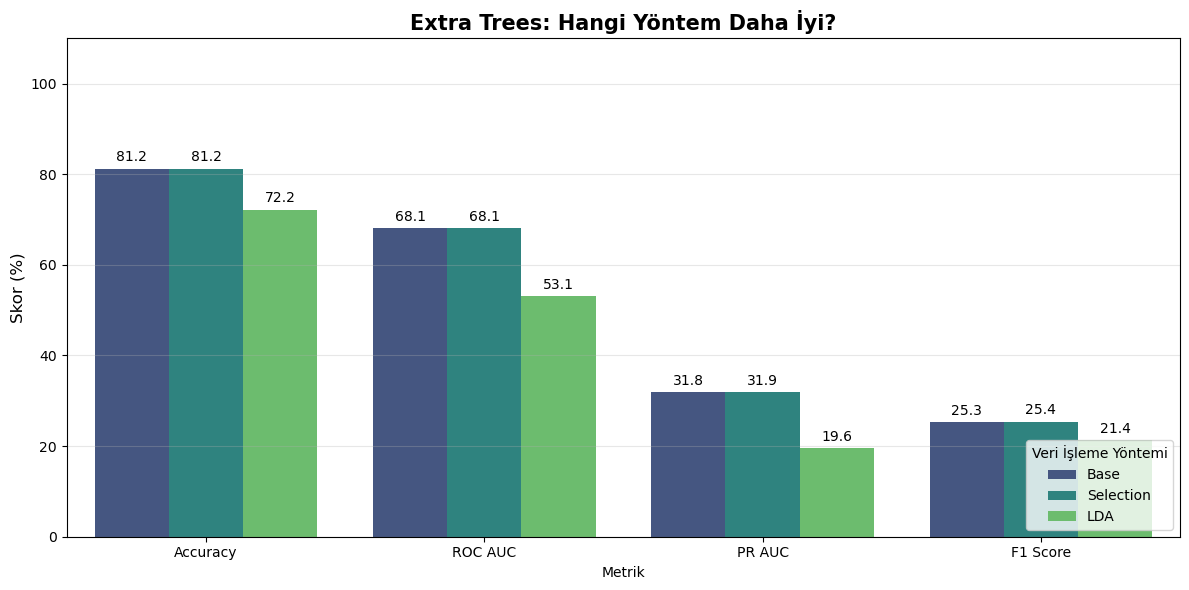

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- HÜCRE: Extra Trees Karşılaştırma (Base vs Selection vs LDA) ---

if 'advanced_results' in locals() and len(advanced_results) > 0:
    # Sonuçları DataFrame'e çevir
    df_all = pd.DataFrame(advanced_results)
    
    # Sadece "Extra Trees" modeline ait satırları al
    df_tree = df_all[df_all['Model'] == 'Extra Trees'].copy()
    
    if not df_tree.empty:
        # 1. TABLO OLARAK GÖSTERME
        print("\n" + "="*60)
        print("EXTRA TREES - PERFORMANS KARŞILAŞTIRMASI")
        print("=" * 60)
        # Okunabilirlik için sıralayalım (PR AUC'ye göre)
        print(df_tree.sort_values(by="PR AUC", ascending=False).to_string(index=False))
        print("-" * 60)

        # 2. GRAFİKLEŞTİRME
        plt.figure(figsize=(12, 6))
        
        # Veriyi grafik için uzun formata çevir (Melt)
        df_melted = df_tree.melt(id_vars=["Yöntem"], 
                                 value_vars=["Accuracy", "ROC AUC", "PR AUC", "F1 Score"], 
                                 var_name="Metrik", value_name="Skor")
        
        # Çubuk Grafik
        ax = sns.barplot(x="Metrik", y="Skor", hue="Yöntem", data=df_melted, palette="viridis")
        
        plt.title("Extra Trees: Hangi Yöntem Daha İyi?", fontsize=15, fontweight='bold')
        plt.ylabel("Skor (%)", fontsize=12)
        plt.ylim(0, 110) # Değerlerin üzerine çıkmaması için biraz pay bırakalım
        plt.legend(title="Veri İşleme Yöntemi", loc='lower right')
        plt.grid(axis='y', alpha=0.3)

        # Çubukların üzerine değerleri yaz
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f', padding=3, fontsize=10)

        plt.tight_layout()
        plt.show()
        
    else:
        print("HATA: 'Extra Trees' modeline ait sonuç bulunamadı.")
        print("Lütfen önceki adımlarda Extra Trees modelini (Base, Selection ve LDA ile) eğittiğinizden emin olun.")

else:
    print("HATA: Henüz hiç sonuç kaydedilmemiş (advanced_results listesi boş).")


LIGHTGBM - PERFORMANS KARŞILAŞTIRMASI
   Model    Yöntem  Accuracy  F1 Score   ROC AUC    PR AUC      MAE
LightGBM      Base 82.399916  7.002836 70.958491 36.725375 0.176001
LightGBM Selection 82.315334  4.564485 69.847801 34.926104 0.176847
LightGBM       LDA 82.101837  0.000000 61.816924 24.894497 0.178982
LightGBM       LDA 82.101837  0.000000 61.816924 24.894497 0.178982
LightGBM       LDA 82.101837  0.000000 61.816924 24.894497 0.178982
------------------------------------------------------------


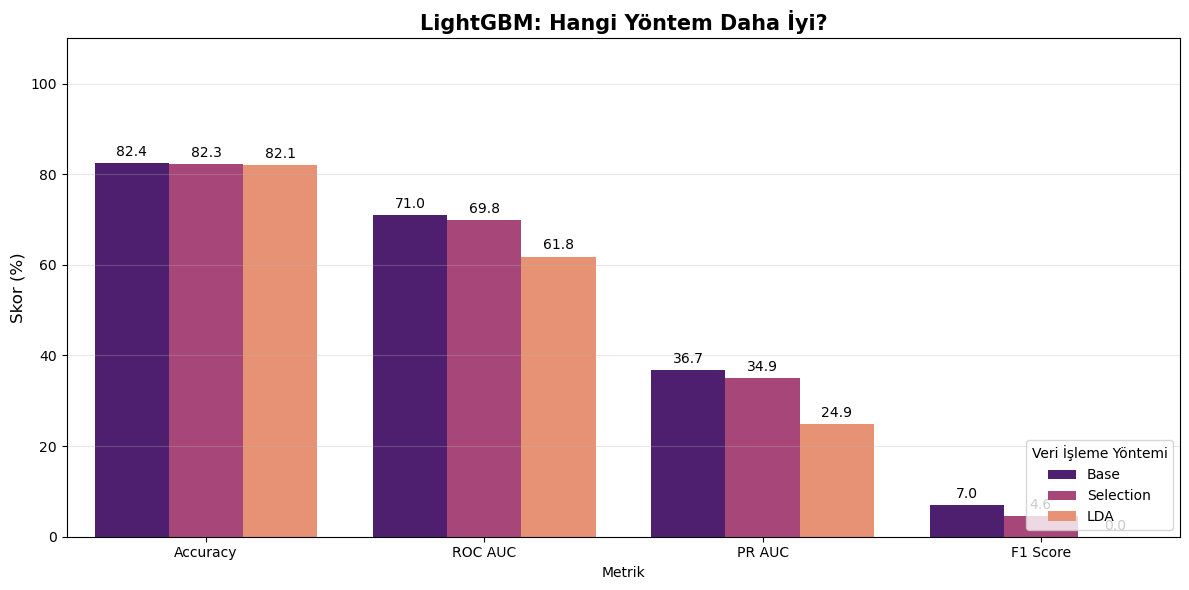

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- HÜCRE: LightGBM Karşılaştırma (Base vs Selection vs LDA) ---

if 'advanced_results' in locals() and len(advanced_results) > 0:
    # Sonuçları DataFrame'e çevir
    df_all = pd.DataFrame(advanced_results)
    
    # Sadece "LightGBM" modeline ait satırları al
    df_lgbm = df_all[df_all['Model'] == 'LightGBM'].copy()
    
    if not df_lgbm.empty:
        # 1. TABLO OLARAK GÖSTERME
        print("\n" + "="*60)
        print("LIGHTGBM - PERFORMANS KARŞILAŞTIRMASI")
        print("=" * 60)
        # Okunabilirlik için sıralayalım (PR AUC'ye göre)
        print(df_lgbm.sort_values(by="PR AUC", ascending=False).to_string(index=False))
        print("-" * 60)

        # 2. GRAFİKLEŞTİRME
        plt.figure(figsize=(12, 6))
        
        # Veriyi grafik için uzun formata çevir (Melt)
        df_melted_lgbm = df_lgbm.melt(id_vars=["Yöntem"], 
                                      value_vars=["Accuracy", "ROC AUC", "PR AUC", "F1 Score"], 
                                      var_name="Metrik", value_name="Skor")
        
        # Çubuk Grafik
        ax = sns.barplot(x="Metrik", y="Skor", hue="Yöntem", data=df_melted_lgbm, palette="magma")
        
        plt.title("LightGBM: Hangi Yöntem Daha İyi?", fontsize=15, fontweight='bold')
        plt.ylabel("Skor (%)", fontsize=12)
        plt.ylim(0, 110)
        plt.legend(title="Veri İşleme Yöntemi", loc='lower right')
        plt.grid(axis='y', alpha=0.3)

        # Çubukların üzerine değerleri yaz
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f', padding=3, fontsize=10)

        plt.tight_layout()
        plt.show()
        
    else:
        print("HATA: 'LightGBM' modeline ait sonuç bulunamadı.")
        print("Lütfen önceki adımlarda LightGBM modelini eğittiğinizden emin olun.")

else:
    print("HATA: Henüz hiç sonuç kaydedilmemiş (advanced_results listesi boş).")


      FİNAL MODEL KARŞILAŞTIRMASI (TÜM SENARYOLAR)
      Model    Yöntem    PR AUC   ROC AUC  F1 Score  Accuracy      MAE
   LightGBM      Base 36.725375 70.958491  7.002836 82.399916 0.176001
   LightGBM Selection 34.926104 69.847801  4.564485 82.315334 0.176847
Extra Trees Selection 31.851683 68.083675 25.398594 81.249016 0.187510
Extra Trees      Base 31.837578 68.072346 25.322745 81.239099 0.187609
   LightGBM       LDA 24.894497 61.816924  0.000000 82.101837 0.178982
   LightGBM       LDA 24.894497 61.816924  0.000000 82.101837 0.178982
   LightGBM       LDA 24.894497 61.816924  0.000000 82.101837 0.178982
Extra Trees       LDA 19.639212 53.065268 21.375532 72.205727 0.277943
Extra Trees       LDA 19.639212 53.065269 21.375532 72.205727 0.277943
Extra Trees       LDA 19.639209 53.065268 21.375532 72.205727 0.277943
--------------------------------------------------------------------------------


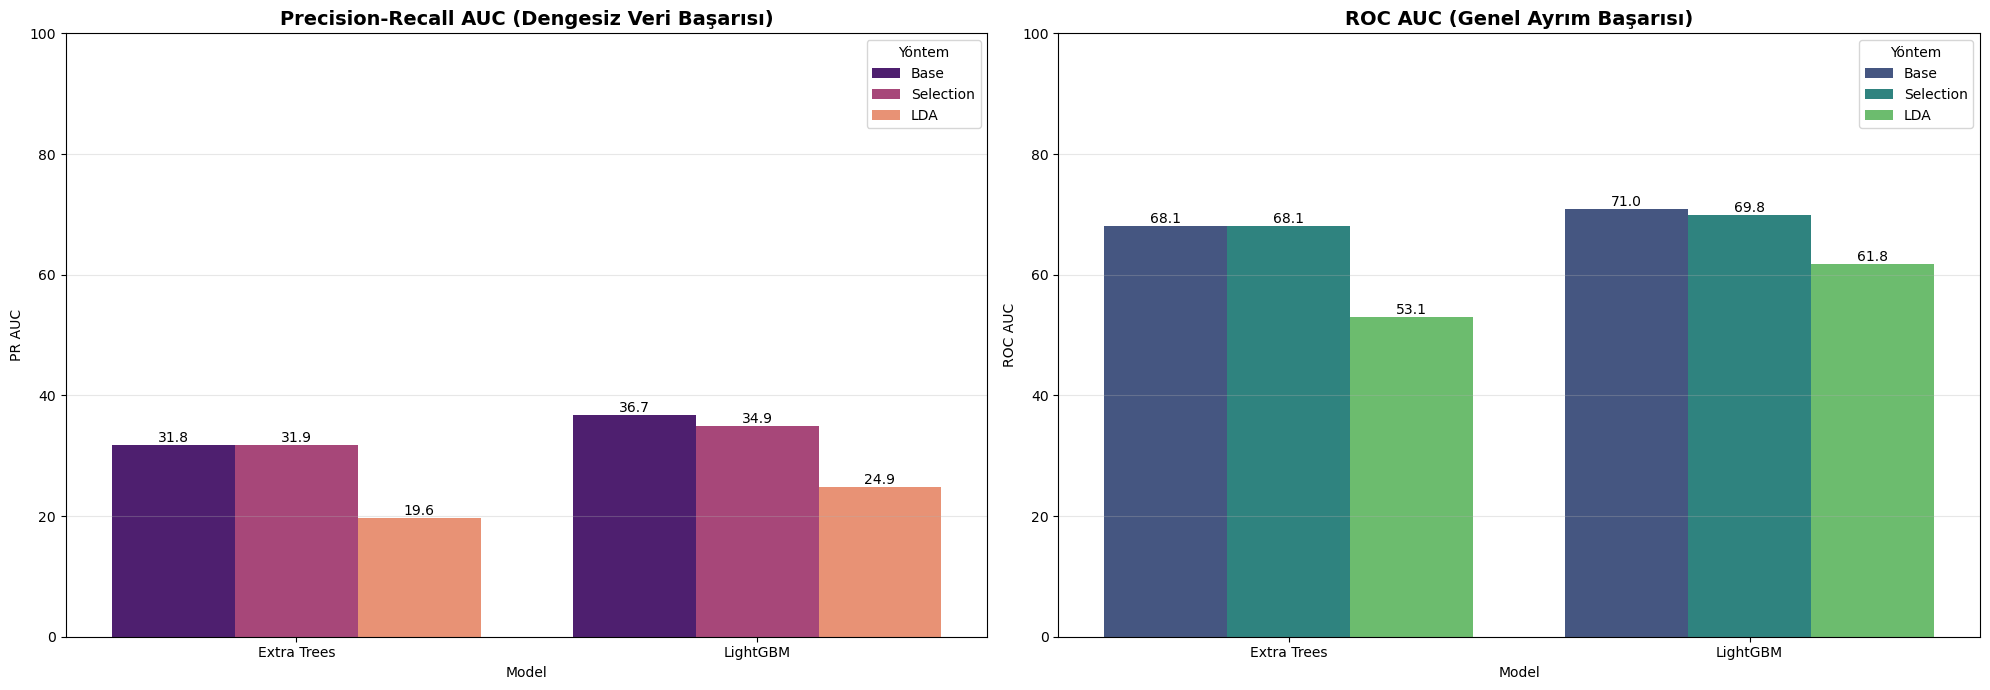


************************************************************
🏆 KAZANAN MODEL: LightGBM (Base)
   PR AUC Skoru: %36.73
   ROC AUC Skoru: %70.96
************************************************************


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- HÜCRE: EXTRA TREES vs LIGHTGBM (BÜYÜK FİNAL) ---

if 'advanced_results' in locals() and len(advanced_results) > 0:
    # 1. Veriyi DataFrame'e Çevir
    df_final = pd.DataFrame(advanced_results)
    
    # 2. ÖZET TABLO (En iyi PR AUC'ye göre sıralı)
    print("\n" + "="*80)
    print("      FİNAL MODEL KARŞILAŞTIRMASI (TÜM SENARYOLAR)")
    print("=" * 80)
    
    # Okunabilirlik için sütun sırasını düzenleyelim
    cols = ["Model", "Yöntem", "PR AUC", "ROC AUC", "F1 Score", "Accuracy", "MAE"]
    # Listede olmayan sütun varsa hata vermesin diye kesişim alıyoruz
    cols = [c for c in cols if c in df_final.columns]
    
    print(df_final[cols].sort_values(by="PR AUC", ascending=False).to_string(index=False))
    print("-" * 80)

    # 3. GÖRSEL KARŞILAŞTIRMA
    # İki önemli metrik için yan yana grafik çizelim: PR AUC (Dengesiz veri için) ve ROC AUC
    fig, axes = plt.subplots(1, 2, figsize=(20, 7))
    
    # Grafik A: PR AUC Karşılaştırması (En Kritik Metrik)
    sns.barplot(x="Model", y="PR AUC", hue="Yöntem", data=df_final, ax=axes[0], palette="magma")
    axes[0].set_title("Precision-Recall AUC (Dengesiz Veri Başarısı)", fontsize=14, fontweight='bold')
    axes[0].set_ylim(0, 100)
    axes[0].grid(axis='y', alpha=0.3)
    for p in axes[0].patches:
        if p.get_height() > 0:
            axes[0].annotate(f'{p.get_height():.1f}', 
                             (p.get_x() + p.get_width() / 2., p.get_height()), 
                             ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    # Grafik B: ROC AUC Karşılaştırması
    sns.barplot(x="Model", y="ROC AUC", hue="Yöntem", data=df_final, ax=axes[1], palette="viridis")
    axes[1].set_title("ROC AUC (Genel Ayrım Başarısı)", fontsize=14, fontweight='bold')
    axes[1].set_ylim(0, 100)
    axes[1].grid(axis='y', alpha=0.3)
    for p in axes[1].patches:
        if p.get_height() > 0:
            axes[1].annotate(f'{p.get_height():.1f}', 
                             (p.get_x() + p.get_width() / 2., p.get_height()), 
                             ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()

    # 4. KAZANAN MODELİ İLAN ET
    best_model_row = df_final.loc[df_final["PR AUC"].idxmax()]
    print("\n" + "*"*60)
    print(f"🏆 KAZANAN MODEL: {best_model_row['Model']} ({best_model_row['Yöntem']})")
    print(f"   PR AUC Skoru: %{best_model_row['PR AUC']:.2f}")
    print(f"   ROC AUC Skoru: %{best_model_row['ROC AUC']:.2f}")
    print("*"*60)

else:
    print("HATA: Sonuç listesi boş. Lütfen önceki model eğitim adımlarını tamamlayın.")